# META 2 - Ex 4.5 e 4.6

In [1]:
from IPython.display import display, HTML

import pandas as pd
import numpy as np
from ReliefF import ReliefF
#from skfeature.function.similarity_based import fisher_score      # pip install skfeature-chappers
pd.set_option('display.max_columns', None)  # Apenas para mostrar todas as colunas dos DataFrames

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest, SelectPercentile

from sklearn.preprocessing import StandardScaler

import seaborn as sns

from sklearn.linear_model import SGDClassifier

from random import random

from sklearn.neural_network import MLPClassifier

#https://github.com/mingliangbai/Fisher-score-and-Laplacian-score-for-feature-selection/blob/master/Fisher%20score/fsFisher.m

## Carrega os dados das features calculadas na meta 1

In [2]:
all_features = pd.read_csv("allFeatures.csv").drop(columns=["ACC_X_Zero_Crossing_Rate",
                                                            "ACC_Y_Zero_Crossing_Rate",
                                                            "ACC_Z_Zero_Crossing_Rate",
                                                            "GYRO_X_Zero_Crossing_Rate",
                                                            "GYRO_Y_Zero_Crossing_Rate",
                                                            "GYRO_Z_Zero_Crossing_Rate",
                                                            "MAG_X_Zero_Crossing_Rate",
                                                            "MAG_Y_Zero_Crossing_Rate",
                                                            "MAG_Z_Zero_Crossing_Rate",
                                                           ])
all_features

,ACC_X_mean,ACC_X_std,ACC_X_median,ACC_X_skew,ACC_X_kurtosis,ACC_X_IQR,ACC_X_calculate_entropy,ACC_X_spectral_entropy,ACC_X_ENERGY,ACC_X_DF,ACC_X_averaged_Deviation,ACC_Y_mean,ACC_Y_std,ACC_Y_median,ACC_Y_skew,ACC_Y_kurtosis,ACC_Y_IQR,ACC_Y_calculate_entropy,ACC_Y_spectral_entropy,ACC_Y_ENERGY,ACC_Y_DF,ACC_Y_averaged_Deviation,ACC_Z_mean,ACC_Z_std,ACC_Z_median,ACC_Z_skew,ACC_Z_kurtosis,ACC_Z_IQR,ACC_Z_calculate_entropy,ACC_Z_spectral_entropy,ACC_Z_ENERGY,ACC_Z_DF,ACC_Z_averaged_Deviation,GYRO_X_mean,GYRO_X_std,GYRO_X_median,GYRO_X_skew,GYRO_X_kurtosis,GYRO_X_IQR,GYRO_X_calculate_entropy,GYRO_X_spectral_entropy,GYRO_X_ENERGY,GYRO_X_DF,GYRO_X_averaged_Deviation,GYRO_Y_mean,GYRO_Y_std,GYRO_Y_median,GYRO_Y_skew,GYRO_Y_kurtosis,GYRO_Y_IQR,GYRO_Y_calculate_entropy,GYRO_Y_spectral_entropy,GYRO_Y_ENERGY,GYRO_Y_DF,GYRO_Y_averaged_Deviation,GYRO_Z_mean,GYRO_Z_std,GYRO_Z_median,GYRO_Z_skew,GYRO_Z_kurtosis,GYRO_Z_IQR,GYRO_Z_calculate_entropy,GYRO_Z_spectral_entropy,GYRO_Z_ENERGY,GYRO_Z_DF,GYRO_Z_averaged_Deviation,MAG_X_mean,MAG_X_std,MAG_X_median,MAG_X_skew,MAG_X_kurtosis,MAG_X_IQR,MAG_X_calculate_entropy,MAG_X_spectral_entropy,MAG_X_ENERGY,MAG_X_DF,MAG_X_averaged_Deviation,MAG_Y_mean,MAG_Y_std,MAG_Y_median,MAG_Y_skew,MAG_Y_kurtosis,MAG_Y_IQR,MAG_Y_calculate_entropy,MAG_Y_spectral_entropy,MAG_Y_ENERGY,MAG_Y_DF,MAG_Y_averaged_Deviation,MAG_Z_mean,MAG_Z_std,MAG_Z_median,MAG_Z_skew,MAG_Z_kurtosis,MAG_Z_IQR,MAG_Z_calculate_entropy,MAG_Z_spectral_entropy,MAG_Z_ENERGY,MAG_Z_DF,MAG_Z_averaged_Deviation,ACC_AI,ACC_SMA,GYRO_AI,GYRO_SMA,MAG_AI,MAG_SMA,AAE,ARE,AVH,AVG,CAGH,EVA_heading,EVA_gravity,Atividade
0,2.329929,0.253342,2.32045,0.864882,15.348457,0.057700,5.984788,4.906173,3.573913e-08,8.031373,0.229741,9.552531,0.205244,9.56030,-1.156770,15.456326,0.036425,6.262872,5.225666,1.078168e-08,15.560784,-0.305426,1.915877,0.094768,1.90960,0.892216,17.071350,0.056150,6.343898,3.894447,2.791592e-09,0.501961,-0.238967,0.069727,1.777248,-0.291390,3.040172,9.843500,0.456001,6.672425,3.534973,0.000847,0.000000,4.011261,1.236437,4.711550,0.373760,2.380225,10.204243,1.029751,6.351299,4.223086,0.016295,0.501961,6.434071,0.917743,3.406595,0.240570,3.308385,13.810821,1.541077,6.672425,3.693402,1.549349e-02,0.501961,4.122310,0.715363,0.008683,0.716360,-0.244460,-0.514508,0.012430,3.875942,4.429686,1.851735e-11,18.572549,0.001049,0.915986,0.016389,0.916670,-0.394517,-0.198916,0.025800,4.688015,4.820018,1.881234e-10,10.541176,-0.005029,0.968439,0.007947,0.969300,0.176119,1.003543,0.010960,3.708418,4.986885,6.291531e-12,0.501961,0.010002,10.022046,13.798338,3.035379,4.597686,1.512894,2.599787,1.643747e-08,0.010879,9.612946,1.892059,-0.073102,0.063553,0.008893,Stand
1,1.995713,0.492077,2.11045,0.352800,0.206786,0.781450,6.441937,4.604139,2.475833e-04,0.501961,-0.568269,9.622844,0.289979,9.58640,-0.622660,3.804620,0.252300,6.527770,5.224757,2.955696e-05,14.556863,-0.061795,1.850789,0.154012,1.88660,0.218335,1.777674,0.210625,6.586593,4.305345,4.431324e-06,0.501961,-0.024485,0.938353,4.391607,-0.214645,2.574104,8.615281,2.084835,6.672425,3.976708,6.296641,1.003922,-0.048711,4.030593,7.478996,1.258600,1.474831,3.117834,5.331845,6.574386,4.403701,34.088568,1.003922,-0.085070,-2.193965,7.878282,-0.814350,-0.316066,1.182581,5.408017,6.672425,4.347456,4.369014e+01,1.003922,-2.037801,0.678481,0.042116,0.701860,-0.422282,-1.514361,0.078680,5.142158,1.922901,2.133464e-08,0.501961,-0.058774,0.944406,0.037944,0.934520,0.337875,-1.008749,0.063490,5.547247,3.490057,1.042216e-08,0.501961,0.045274,1.005333,0.038724,0.993420,0.305434,-1.459463,0.070200,5.166477,1.421156,1.237417e-08,0.501961,0.055605,10.014860,13.469346,8.652250,13.019811,1.538384,2.628220,9.385720e-05,28.025117,9.666724,1.825292,-0.148854,0.239766,0.023487,Stand
2,1.413991,0.352778,1.32980,0.886113,2.451716,0.357900,6.613602,3.829667,1.597482e-05,0.501961,-0.535876,9.742375,0.229803,9.73160,-0.525898,2.210588,0.230700,6.652817,4.458313,4.021650e-06,10.039216,-0.230806,1.781629,0.099065,1.78425,0.153507,1.338147,0

In [3]:
# Separa os dados em 2 DataFrames
# target: Coluna das atividades
# all_features_without_target: Os valores das várias features

target = pd.DataFrame(all_features["Atividade"])
all_features_without_target = all_features.drop(columns=["Atividade"])
display(target)
display(all_features_without_target)

,Atividade
0,Stand
1,Stand
2,Stand
3,Stand
4,Stand
...,...
14464,Climb Stairs and Talk to Walk and Talk
14465,Climb Stairs and Talk to Walk and Talk
14466,Climb Stairs and Talk to Walk and Talk
14467,Climb Stairs and Talk to Walk and Talk


,ACC_X_mean,ACC_X_std,ACC_X_median,ACC_X_skew,ACC_X_kurtosis,ACC_X_IQR,ACC_X_calculate_entropy,ACC_X_spectral_entropy,ACC_X_ENERGY,ACC_X_DF,ACC_X_averaged_Deviation,ACC_Y_mean,ACC_Y_std,ACC_Y_median,ACC_Y_skew,ACC_Y_kurtosis,ACC_Y_IQR,ACC_Y_calculate_entropy,ACC_Y_spectral_entropy,ACC_Y_ENERGY,ACC_Y_DF,ACC_Y_averaged_Deviation,ACC_Z_mean,ACC_Z_std,ACC_Z_median,ACC_Z_skew,ACC_Z_kurtosis,ACC_Z_IQR,ACC_Z_calculate_entropy,ACC_Z_spectral_entropy,ACC_Z_ENERGY,ACC_Z_DF,ACC_Z_averaged_Deviation,GYRO_X_mean,GYRO_X_std,GYRO_X_median,GYRO_X_skew,GYRO_X_kurtosis,GYRO_X_IQR,GYRO_X_calculate_entropy,GYRO_X_spectral_entropy,GYRO_X_ENERGY,GYRO_X_DF,GYRO_X_averaged_Deviation,GYRO_Y_mean,GYRO_Y_std,GYRO_Y_median,GYRO_Y_skew,GYRO_Y_kurtosis,GYRO_Y_IQR,GYRO_Y_calculate_entropy,GYRO_Y_spectral_entropy,GYRO_Y_ENERGY,GYRO_Y_DF,GYRO_Y_averaged_Deviation,GYRO_Z_mean,GYRO_Z_std,GYRO_Z_median,GYRO_Z_skew,GYRO_Z_kurtosis,GYRO_Z_IQR,GYRO_Z_calculate_entropy,GYRO_Z_spectral_entropy,GYRO_Z_ENERGY,GYRO_Z_DF,GYRO_Z_averaged_Deviation,MAG_X_mean,MAG_X_std,MAG_X_median,MAG_X_skew,MAG_X_kurtosis,MAG_X_IQR,MAG_X_calculate_entropy,MAG_X_spectral_entropy,MAG_X_ENERGY,MAG_X_DF,MAG_X_averaged_Deviation,MAG_Y_mean,MAG_Y_std,MAG_Y_median,MAG_Y_skew,MAG_Y_kurtosis,MAG_Y_IQR,MAG_Y_calculate_entropy,MAG_Y_spectral_entropy,MAG_Y_ENERGY,MAG_Y_DF,MAG_Y_averaged_Deviation,MAG_Z_mean,MAG_Z_std,MAG_Z_median,MAG_Z_skew,MAG_Z_kurtosis,MAG_Z_IQR,MAG_Z_calculate_entropy,MAG_Z_spectral_entropy,MAG_Z_ENERGY,MAG_Z_DF,MAG_Z_averaged_Deviation,ACC_AI,ACC_SMA,GYRO_AI,GYRO_SMA,MAG_AI,MAG_SMA,AAE,ARE,AVH,AVG,CAGH,EVA_heading,EVA_gravity
0,2.329929,0.253342,2.32045,0.864882,15.348457,0.057700,5.984788,4.906173,3.573913e-08,8.031373,0.229741,9.552531,0.205244,9.56030,-1.156770,15.456326,0.036425,6.262872,5.225666,1.078168e-08,15.560784,-0.305426,1.915877,0.094768,1.90960,0.892216,17.071350,0.056150,6.343898,3.894447,2.791592e-09,0.501961,-0.238967,0.069727,1.777248,-0.291390,3.040172,9.843500,0.456001,6.672425,3.534973,0.000847,0.000000,4.011261,1.236437,4.711550,0.373760,2.380225,10.204243,1.029751,6.351299,4.223086,0.016295,0.501961,6.434071,0.917743,3.406595,0.240570,3.308385,13.810821,1.541077,6.672425,3.693402,1.549349e-02,0.501961,4.122310,0.715363,0.008683,0.716360,-0.244460,-0.514508,0.012430,3.875942,4.429686,1.851735e-11,18.572549,0.001049,0.915986,0.016389,0.916670,-0.394517,-0.198916,0.025800,4.688015,4.820018,1.881234e-10,10.541176,-0.005029,0.968439,0.007947,0.969300,0.176119,1.003543,0.010960,3.708418,4.986885,6.291531e-12,0.501961,0.010002,10.022046,13.798338,3.035379,4.597686,1.512894,2.599787,1.643747e-08,0.010879,9.612946,1.892059,-0.073102,0.063553,0.008893
1,1.995713,0.492077,2.11045,0.352800,0.206786,0.781450,6.441937,4.604139,2.475833e-04,0.501961,-0.568269,9.622844,0.289979,9.58640,-0.622660,3.804620,0.252300,6.527770,5.224757,2.955696e-05,14.556863,-0.061795,1.850789,0.154012,1.88660,0.218335,1.777674,0.210625,6.586593,4.305345,4.431324e-06,0.501961,-0.024485,0.938353,4.391607,-0.214645,2.574104,8.615281,2.084835,6.672425,3.976708,6.296641,1.003922,-0.048711,4.030593,7.478996,1.258600,1.474831,3.117834,5.331845,6.574386,4.403701,34.088568,1.003922,-0.085070,-2.193965,7.878282,-0.814350,-0.316066,1.182581,5.408017,6.672425,4.347456,4.369014e+01,1.003922,-2.037801,0.678481,0.042116,0.701860,-0.422282,-1.514361,0.078680,5.142158,1.922901,2.133464e-08,0.501961,-0.058774,0.944406,0.037944,0.934520,0.337875,-1.008749,0.063490,5.547247,3.490057,1.042216e-08,0.501961,0.045274,1.005333,0.038724,0.993420,0.305434,-1.459463,0.070200,5.166477,1.421156,1.237417e-08,0.501961,0.055605,10.014860,13.469346,8.652250,13.019811,1.538384,2.628220,9.385720e-05,28.025117,9.666724,1.825292,-0.148854,0.239766,0.023487
2,1.413991,0.352778,1.32980,0.886113,2.451716,0.357900,6.613602,3.829667,1.597482e-05,0.501961,-0.535876,9.742375,0.229803,9.73160,-0.525898,2.210588,0.230700,6.652817,4.458313,4.021650e-06,10.039216,-0.230806,1.781629,0.099065,1.78425,0.153507,1.338147,0.099075,6.652817,4.548

## 4.5 - ReliefF

In [4]:
def reliefF(data, number_features, debug=False):
    
    activities_labels = ["", "Stand", "Sit", "Sit and Talk", "Walk", "Walk and Talk", "Climb Stair", "Climb Stair and Talk", "Stand to Sit", "Sit to Stand", "Stand to Sit and Talk", "Sit to Stand and Talk", "Stand to Walk", "Walk to Stand", "Stand to Climb Stairs / Stand to Climb Stairs and Talk", "Climb Stairs to Walk", "Climb Stairs and Talk to Walk and Talk"]

    X = data.drop(columns = ["Atividade"]).to_numpy()
    y = np.array(list(map(lambda x: activities_labels.index(x), data["Atividade"])))
    
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    fs = ReliefF(n_neighbors=100, n_features_to_keep=number_features)
    X_train = fs.fit_transform(X_train, y_train)
    X_test_subset = fs.transform(X_test)
    if X_test_subset.shape[1] == number_features:
        if debug:
            print("Sucess!")
    else:
        print("Nop!")
        
    return list(map(lambda i: list(all_features.columns)[i], fs.top_features))[:number_features]

## 4.5 - Fisher Score

In [5]:
def fisher_score(data, number_features):
    activities_labels = ["", "Stand", "Sit", "Sit and Talk", "Walk", "Walk and Talk", "Climb Stair", "Climb Stair and Talk", "Stand to Sit", "Sit to Stand", "Stand to Sit and Talk", "Sit to Stand and Talk", "Stand to Walk", "Walk to Stand", "Stand to Climb Stairs / Stand to Climb Stairs and Talk", "Climb Stairs to Walk", "Climb Stairs and Talk to Walk and Talk"]

    X = data.drop(columns = ["Atividade"])
    y = np.array(list(map(lambda x: activities_labels.index(x), data["Atividade"])))
    
    for col in X.columns:
        col_data = X[col]
        minVal = min(col_data)
        maxVal = max(col_data)
        X[col] = (col_data - minVal) / (maxVal - minVal)
        
    fisher_score = chi2(X, y)
    p_values = pd.Series(fisher_score[1], index=X.columns)
    p_values.sort_values(ascending=True, inplace=True)
    return p_values[:number_features]

In [6]:
features_ordenadas = pd.DataFrame(columns=["Fisher Score", "ReliefF"])

features_ordenadas["Fisher Score"] = list(fisher_score(all_features, 10).index)
features_ordenadas["ReliefF"] = reliefF(all_features, 10)

features_ordenadas.index = np.arange(1, len(features_ordenadas) + 1)

features_ordenadas

,Fisher Score,ReliefF
1,GYRO_Z_std,MAG_X_IQR
2,MAG_X_DF,MAG_Z_IQR
3,MAG_X_spectral_entropy,MAG_Y_IQR
4,GYRO_Z_IQR,MAG_Z_median
5,MAG_Z_DF,MAG_X_median
6,MAG_X_calculate_entropy,MAG_Y_median
7,MAG_Z_spectral_entropy,GYRO_Y_median
8,MAG_X_std,ACC_X_IQR
9,MAG_Z_calculate_entropy,ACC_X_median
10,MAG_Y_DF,ACC_Z_median


## Conclusões
- Após implementar os algoritmos de ReliefF e de Fisher Score para retirar as 10 melhores features para representar o dataset, podemos concluir que não há uma única feature em comum entre as duas abordagens (como podemos ver em cima).


- Respondendo ao 4.6.1, para obter as features relativas a esta compressão seria apenas necessário mapear o index desta tabela para a tabela com todas as features e dessa tabela com todas as features, podemos mapear para a janela de 2 segundos que tem o sinal RAW. O exemplo está no 4.4.1 onde fazemos o mesmo para o PCA.


- A vantagem destas abordagens é que conseguimos reduzir bastante o número de features sem perder a interpretabilidade dos dados, ao contrário do que acontece no algoritmo do PCA. Outra vantagem é que assim podemos estar a remover/ignorar features que teriam pouca influência nos algoritmos de machine learning, otimizando assim estes algoritmos.


- As limitações destas abordagens é que, por exemplo neste caso em específico, 10 features pode não ser suficiente para representar o Dataset, estando assim a perder informação preciosa para os algoritmos de machine learning, resultando assim num loop de tentativa e erro até encontrar o número ideal de features

# Parte B

## Exercício 1.1

In [7]:
# Separa os dados em 2 grupos (Train, Test) com base numa percentagem
def Train_Test(x, y, test_size):
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=test_size)
    out = {
        "Train": [x_train, y_train],
        "Test": [x_test, y_test]
          }
    return out

# Separa os dados em 3 grupos (Train, Test, Validation) com base em duas percentagens
def Train_Validation_Test(x, y, test_size, validation_size):
    x_train_validation, x_test, y_train_validation, y_test = train_test_split(
        x, y, test_size=test_size)
    
    x_train, x_validation, y_train, y_validation = train_test_split(
        x_train_validation, y_train_validation, test_size=validation_size/(1-test_size))
    
    out = {
        "Train": [x_train, y_train],
        "Validation": [x_validation, y_validation],
        "Test": [x_test, y_test]
          }
    return out

# Retorna um array com os varios treinos e testes
def K_fold(x, y, n_splits):
    kf = KFold(n_splits=n_splits, shuffle = True)
    out = []
    for train_index, test_index in kf.split(x):
        out.append({
                    "Train": [x[train_index], y[train_index]],
                    "Test": [x[test_index], y[test_index]]
                  })
    return out

In [2]:
# Testar implementações
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
print("\n\t --Train Test--")
display(Train_Test(X, y, 0.4))
print("\n\t --Train Validation Test--")
display(Train_Validation_Test(X, y, 0.2, 0.2))
print("\n\t --K Fold--")
display(K_fold(X, y ,4))

NameError: name 'np' is not defined

## Exercício 1.2 - Métricas de Exatidação

In [8]:
from sklearn.metrics import confusion_matrix
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix
from sklearn.metrics import f1_score
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score
from sklearn.metrics import recall_score
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score
from sklearn.metrics import precision_score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score

# Retorna dicionário com as 4 métricas de exatidação (Confusion Matrix, Recall, Precision, F1-Score)
def calcula_metricas(pred, real):
    out = {
        "Confusion Matrix" : confusion_matrix(real, pred),
        "Recall" : recall_score(real, pred, average='weighted'),
        "Precision" : precision_score(real, pred, average='weighted'),
        "f1_score": f1_score(real, pred, average='weighted')
    }
    return out

# Mostra uma tabela com Recall, Precision e F1-Score e um gráfico da Confusion Matrix
def visualiza_metricas(metricas, map_y=None):
    try:
        if map_y is not None:
            metricas["Confusion Matrix"] = pd.DataFrame(metricas["Confusion Matrix"], columns=map_y, index=map_y)
        display(pd.DataFrame([metricas["Recall"], metricas["Precision"], metricas["f1_score"]], columns=["Score"]).rename(index={0: 'Recall', 1: 'Precision', 2: 'F1_Score'}))
        f, ax = plt.subplots()
        sns.heatmap(metricas["Confusion Matrix"], annot=True, cmap='viridis', ax=ax)
        plt.title("Confusion Matrix")
        plt.show()
    except:
        display(pd.DataFrame(metricas["Confusion Matrix"]))
        display(pd.DataFrame([metricas["Recall"], metricas["Precision"], metricas["f1_score"]], columns=["Score"]).rename(index={0: 'Recall', 1: 'Precision', 2: 'F1_Score'}))

In [ ]:
# Exemplo de teste

real = [0, 1, 2, 0, 1, 2]
pred = [0, 1, 2, 0, 0, 1]
print(calcula_metricas(pred, real))
visualiza_metricas(calcula_metricas(pred, real))

## Exercício 2

In [9]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

# Carregar os dados do dataset "Iris" e respetiva separação dos mesmos
iris = datasets.load_iris()
x_iris = iris["data"]
y_iris = iris["target"]
# print(iris["DESCR"])

In [10]:
# Implementação do KNN com k vizinhos
def k_neighbors(x, y, k):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(x, y)
    return neigh

### 2.1.1 - Train-only

,Score
Recall,1.0
Precision,1.0
F1_Score,1.0


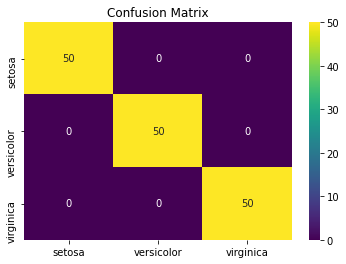

In [11]:
# Implementação do 2.1.1, para train-only
def ex211_T0(x, y, map_y):
    k = 1
    model = k_neighbors(x, y, k)
    pred = model.predict(x)
    real = y
    metr = calcula_metricas(pred, real)
    visualiza_metricas(metr, map_y=map_y)
    
ex211_T0(x_iris, y_iris, iris["target_names"])

### 2.1.1 - TT 70-30

,Score
Recall,0.955556
Precision,0.955556
F1_Score,0.955556


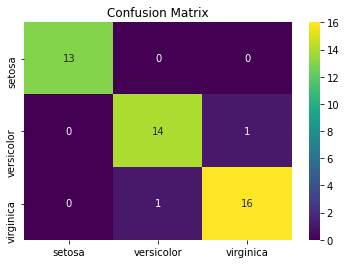

In [12]:
# Implementação do 2.1.1, para Train/Test com 70/30
def ex211_TT(x, y, k=1, map_y=None):
    dataset = Train_Test(x, y, 0.3)
    model = k_neighbors(dataset["Train"][0], dataset["Train"][1], k)
    pred = model.predict(dataset["Test"][0])
    real = dataset["Test"][1]
    metr = calcula_metricas(pred, real)
    visualiza_metricas(metr, map_y=map_y)

ex211_TT(x_iris, y_iris, map_y=iris["target_names"])

### 2.1.1 - 10-fold cross-validation (10CV)


,Score
Recall,0.933333
Precision,0.946667
F1_Score,0.934473


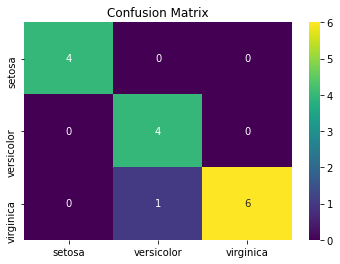

,Score
Recall,1.0
Precision,1.0
F1_Score,1.0


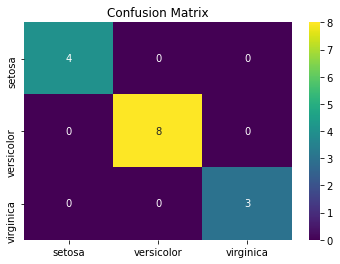

,Score
Recall,0.866667
Precision,0.900000
F1_Score,0.862857


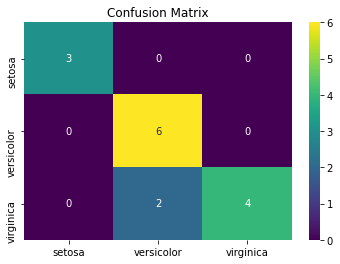

,Score
Recall,1.0
Precision,1.0
F1_Score,1.0


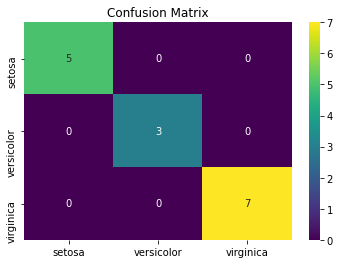

,Score
Recall,1.0
Precision,1.0
F1_Score,1.0


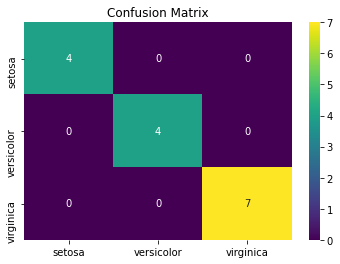

,Score
Recall,1.0
Precision,1.0
F1_Score,1.0


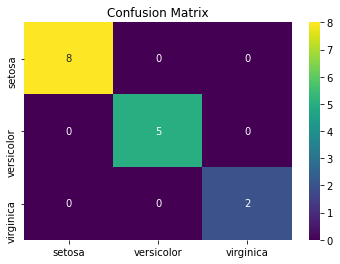

,Score
Recall,0.933333
Precision,0.944444
F1_Score,0.932660


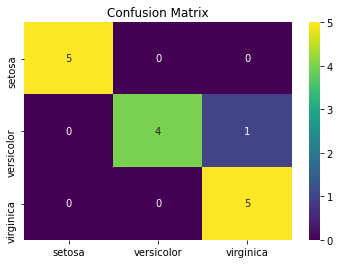

,Score
Recall,0.933333
Precision,0.950000
F1_Score,0.934392


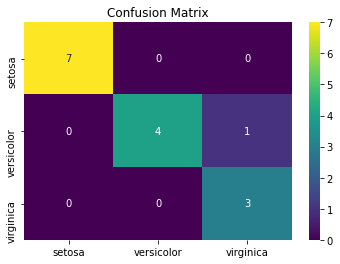

,Score
Recall,0.933333
Precision,0.944444
F1_Score,0.933333


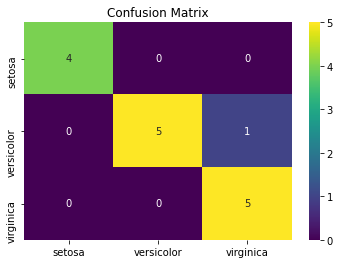

,Score
Recall,1.0
Precision,1.0
F1_Score,1.0


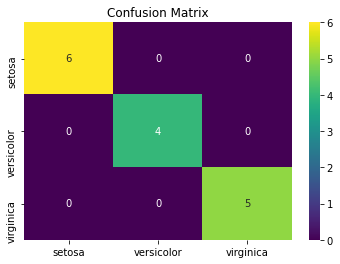

In [13]:
# Implementação do 2.1.1, para 10-fold Cross Validation
def ex211_10FCV(x, y, n_splits, map_y=None):
    k = 1
    folds = K_fold(x, y, n_splits)
    for i, dataset in enumerate(folds):
        display(HTML("<h2>------------------------- Fold " + str(i) + " -------------------------</h3>"))
        model = k_neighbors(dataset["Train"][0], dataset["Train"][1], k)
        pred = model.predict(dataset["Test"][0])
        real = dataset["Test"][1]
        metr = calcula_metricas(pred, real)
        visualiza_metricas(metr, map_y)
        
ex211_10FCV(x_iris, y_iris, 10, map_y=iris["target_names"])

### 2.1.2 - Train-only

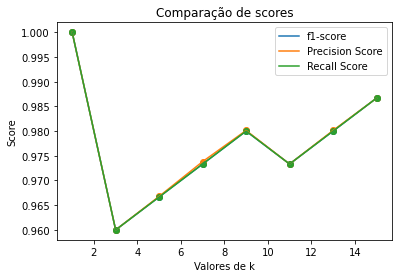

,Score
Recall,0.986667
Precision,0.986667
F1_Score,0.986667


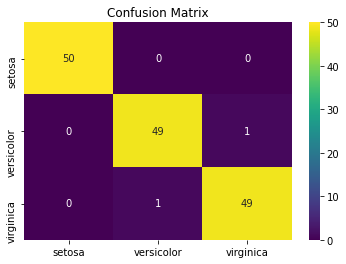

In [14]:
# Implementação do 2.1.2, para train-only, com k de KNN a variar entre {1, 3, ..., 15}
def ex212_T0(x, y, map_y=None):
    ks = [i for i in range(1, 16, 2)]
    f1_scores = []
    Precisions = []
    Recalls = []
    models = []
    dataset = Train_Validation_Test(x, y, 0.3, 0.3)
    for k in ks:
        model = k_neighbors(x, y, k)
        pred = model.predict(x)
        real = y
        metr = calcula_metricas(pred, real)
        #visualiza_metricas(metr,map_y = iris["target_names"])
        f1_scores.append(metr["f1_score"])
        Precisions.append(metr["Precision"])
        Recalls.append(metr["Recall"])
        models.append(model)

    plt.figure()
    plt.plot(ks, f1_scores, label="f1-score")
    plt.scatter(ks, f1_scores)
    plt.plot(ks, Precisions, label="Precision Score")
    plt.scatter(ks, Precisions)
    plt.plot(ks, Recalls, label="Recall Score")
    plt.scatter(ks, Recalls)
    plt.title("Comparação de scores")
    plt.xlabel("Valores de k")
    plt.ylabel("Score")
    plt.legend()
    display(HTML("<h3>Best k value: " + str(ks[f1_scores.index(max(f1_scores))]) + "</h3>"))
    plt.show()
    best_model = models[f1_scores.index(max(f1_scores))]
    display(HTML("<h2>Test Results</h2>"))
    pred_test = model.predict(x)
    real = y
    metr = calcula_metricas(pred_test, real)
    visualiza_metricas(metr, map_y=map_y)
    
ex212_T0(x_iris, y_iris, map_y=iris["target_names"])

### 2.1.2 - TVT 40-30-30

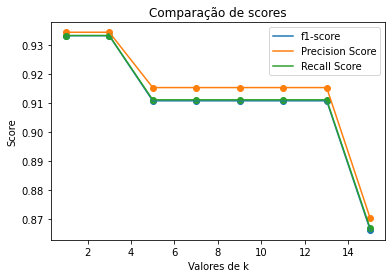

,Score
Recall,0.955556
Precision,0.955556
F1_Score,0.955556


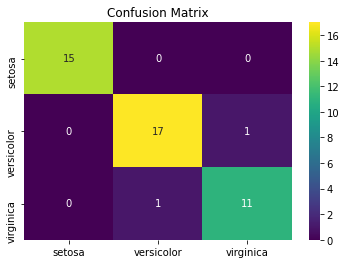

In [15]:
# Implementação do 2.1.2, para Train/Validation/Test com 40/30/30, com k de KNN a variar entre {1, 3, ..., 15}
def ex_212_TVT(x, y, map_y=None):
    ks = [i for i in range(1, 16, 2)]
    f1_scores = []
    Precisions = []
    Recalls = []
    models = []
    dataset = Train_Validation_Test(x, y, 0.3, 0.3)
    for k in ks:
        model = k_neighbors(dataset["Train"][0], dataset["Train"][1], k)
        pred = model.predict(dataset["Validation"][0])
        real = dataset["Validation"][1]
        metr = calcula_metricas(pred, real)
        #visualiza_metricas(metr,map_y = iris["target_names"])
        f1_scores.append(metr["f1_score"])
        Precisions.append(metr["Precision"])
        Recalls.append(metr["Recall"])
        models.append(model)

    plt.figure()
    plt.plot(ks, f1_scores, label="f1-score")
    plt.scatter(ks, f1_scores)
    plt.plot(ks, Precisions, label="Precision Score")
    plt.scatter(ks, Precisions)
    plt.plot(ks, Recalls, label="Recall Score")
    plt.scatter(ks, Recalls)
    plt.title("Comparação de scores")
    plt.xlabel("Valores de k")
    plt.ylabel("Score")
    plt.legend()
    display(HTML("<h3>Best k value: " + str(ks[f1_scores.index(max(f1_scores))]) + "</h3>"))
    plt.show()
    best_model = models[f1_scores.index(max(f1_scores))]
    display(HTML("<h2>Test Results</h2>"))
    pred_test = model.predict(dataset["Test"][0])
    real = dataset["Test"][1]
    metr = calcula_metricas(pred_test, real)
    visualiza_metricas(metr, map_y=map_y)
    
ex_212_TVT(x_iris, y_iris, map_y=iris["target_names"])

### 2.1.2 -  10CV
Fazendo variar k na gama {1, 3, 5,…, 15}.

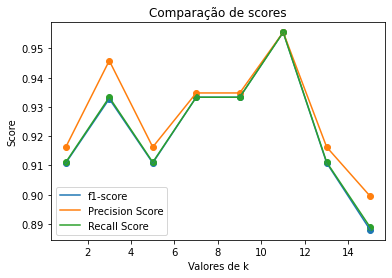

,Score
Recall,1.0
Precision,1.0
F1_Score,1.0


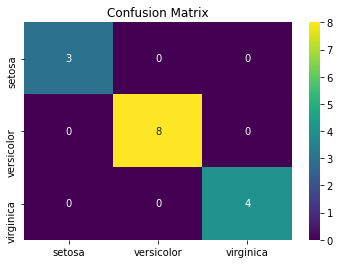

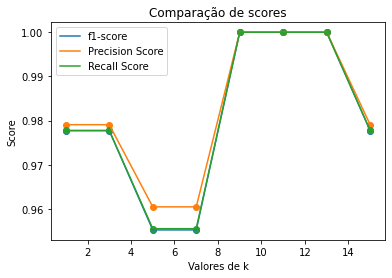

,Score
Recall,1.0
Precision,1.0
F1_Score,1.0


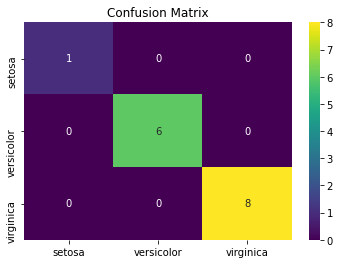

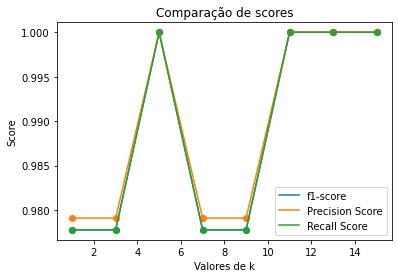

,Score
Recall,0.933333
Precision,0.944444
F1_Score,0.931602


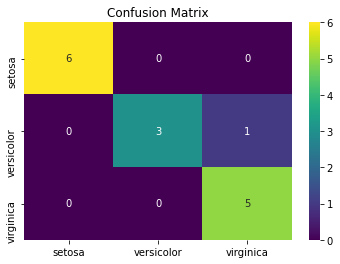

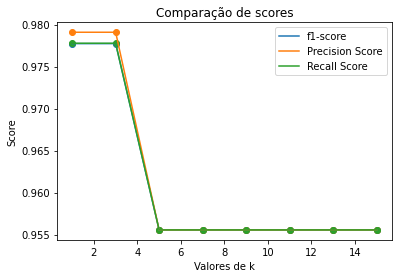

,Score
Recall,0.933333
Precision,0.944444
F1_Score,0.931602


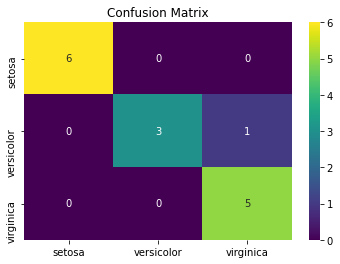

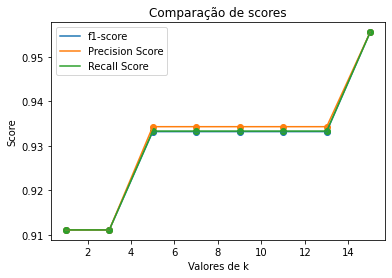

,Score
Recall,0.866667
Precision,0.866667
F1_Score,0.866667


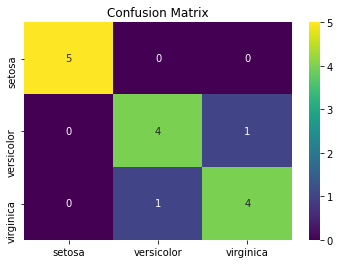

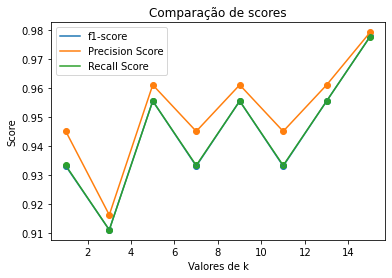

,Score
Recall,1.0
Precision,1.0
F1_Score,1.0


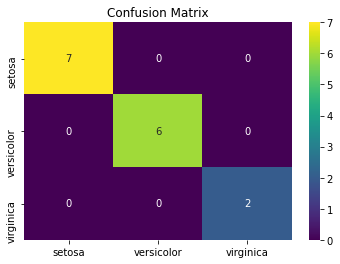

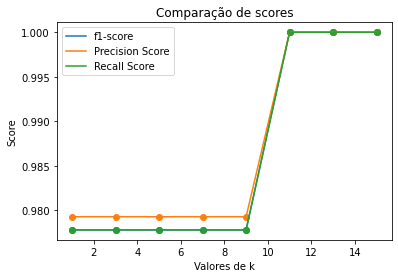

,Score
Recall,1.0
Precision,1.0
F1_Score,1.0


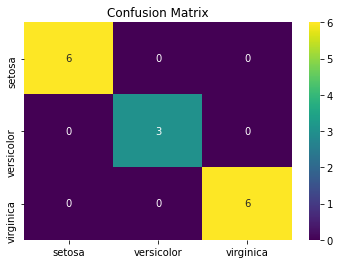

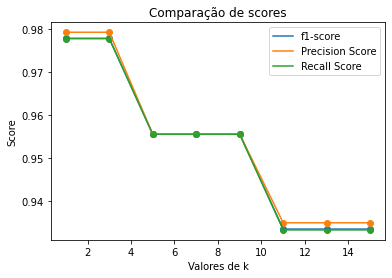

,Score
Recall,0.933333
Precision,0.946667
F1_Score,0.935076


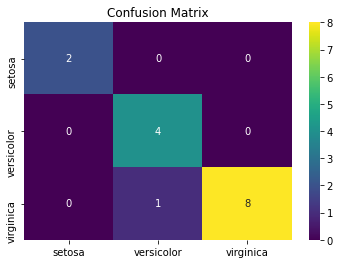

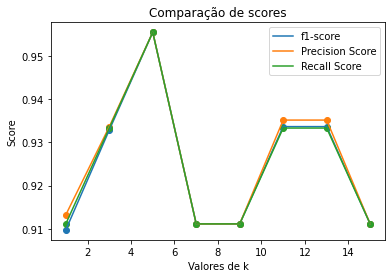

,Score
Recall,1.0
Precision,1.0
F1_Score,1.0


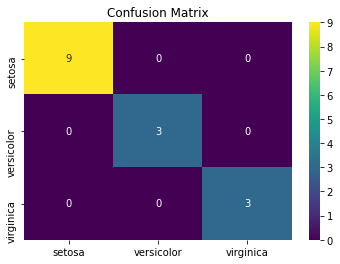

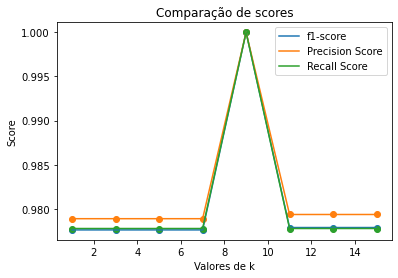

,Score
Recall,1.0
Precision,1.0
F1_Score,1.0


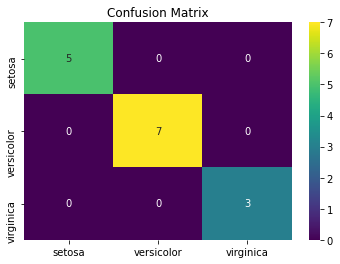

,1,3,5,7,9,11,13,15
Fold 0,0.910867,0.932782,0.910867,0.933333,0.933333,0.955556,0.910867,0.887969
Fold 1,0.977731,0.977731,0.955275,0.955275,1.000000,1.000000,1.000000,0.977731
Fold 2,0.977756,0.977756,1.000000,0.977756,0.977756,1.000000,1.000000,1.000000
Fold 3,0.977731,0.977731,0.955556,0.955556,0.955556,0.955556,0.955556,0.955556
Fold 4,0.911111,0.911111,0.933210,0.933210,0.933210,0.933210,0.933210,0.955556
Fold 5,0.933111,0.911111,0.955556,0.933111,0.955556,0.933111,0.955556,0.977802
Fold 6,0.977778,0.977778,0.977778,0.977778,0.977778,1.000000,1.000000,1.000000
Fold 7,0.977843,0.977843,0.955556,0.955556,0.955556,0.933530,0.933530,0.933530
Fold 8,0.909713,0.932874,0.955556,0.911111,0.911111,0.933670,0.933670,0.911111
Fold 9,0.977618,0.977618,0.977618,0.977618,1.000000,0.977889,0.977889,0.977889


F1-Score (y) in order to k (subplots) and number of features (x)


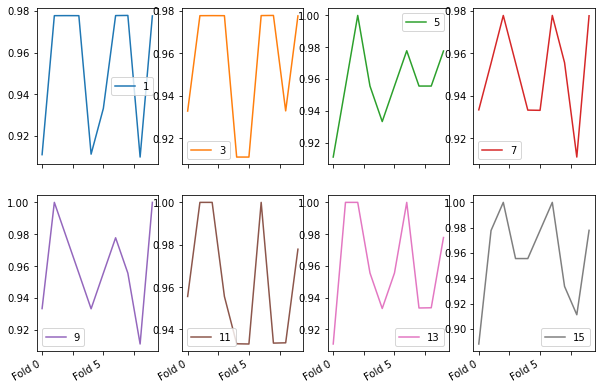

F1-Score (y) in order to k (x) and number of features (subplots)


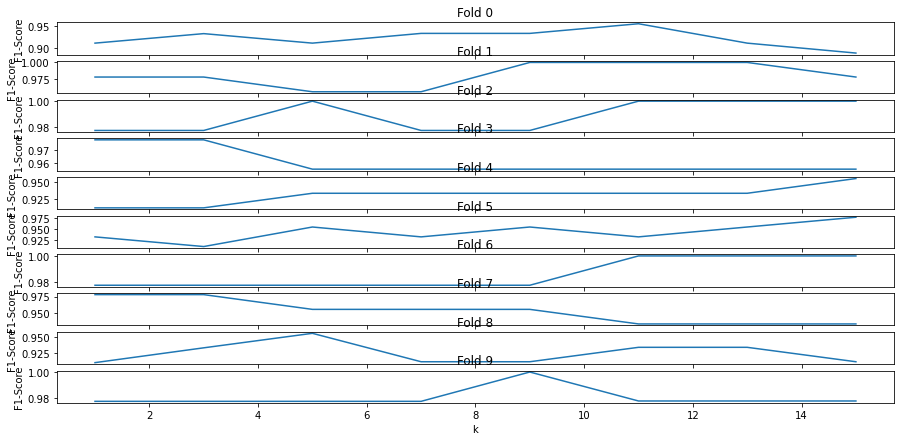

In [16]:
# Implementação do 2.1.1, para 10-fold Cross Validation, com k de KNN a variar entre {1, 3, ..., 15}
def ex_212_10CV(x, y, map_y=None):
    ks = [i for i in range(1, 16, 2)]
    f1_scores_folds = []
    folds = K_fold(x, y, 10)
    for i, dataset in enumerate(folds):
        f1_scores = []
        Precisions = []
        Recalls = []
        models = []
        train_validate = Train_Test(x, y, 0.3)
        for k in ks:
            model = k_neighbors(train_validate["Train"][0], train_validate["Train"][1], k)
            pred = model.predict(train_validate["Test"][0])
            real = train_validate["Test"][1]
            metr = calcula_metricas(pred, real)
            f1_scores.append(metr["f1_score"])
            Precisions.append(metr["Precision"])
            Recalls.append(metr["Recall"])
            models.append(model)
        f1_scores_folds.append(f1_scores)
        display(HTML("<h2>------------------------- Fold " + str(i) + " -------------------------</h3>"))
        plt.figure()
        plt.plot(ks, f1_scores, label="f1-score")
        plt.scatter(ks,f1_scores)
        plt.plot(ks, Precisions, label="Precision Score")
        plt.scatter(ks, Precisions)
        plt.plot(ks, Recalls, label="Recall Score")
        plt.scatter(ks, Recalls)
        plt.title("Comparação de scores")
        plt.xlabel("Valores de k")
        plt.ylabel("Score")
        plt.legend()
        display(HTML("<h3>Best k value: " + str(ks[f1_scores.index(max(f1_scores))]) + "</h3>"))
        display(HTML("<h3>Average Score: " + str(round(np.array(f1_scores).mean(), 4)) + "</h3>"))
        display(HTML("<h3>Standard Deviation: " + str(round(np.array(f1_scores).std(), 4)) +"</h3>"))
        plt.show()
        best_model = models[f1_scores.index(max(f1_scores))]
        display(HTML("<h2>Test Results from the best model in this Fold</h2>"))
        pred_test = model.predict(dataset["Test"][0])
        real = dataset["Test"][1]
        metr = calcula_metricas(pred_test, real)
        visualiza_metricas(metr, map_y=map_y)
        
    tabela = pd.DataFrame(f1_scores_folds, columns=ks, index=["Fold " + str(i) for i in range(10)])
    display(HTML("<h2>Valores de F1-Score para todos os Folds e k de KNN</h2>"))
    display(tabela)
    print("F1-Score (y) in order to k (subplots) and number of features (x)")
    tabela.plot(subplots=True, layout=(2, 4), figsize=(10, 7))
    plt.show()
    fig, ax = plt.subplots(10, 1, figsize=(15, 7))
    print('F1-Score (y) in order to k (x) and number of features (subplots)')
    i = 0
    for index, row in tabela.iterrows():
        ax[i].plot(row)
        ax[i].set(xlabel='k', ylabel='F1-Score')
        ax[i].set_title(index)
        i += 1
    plt.tight_layout()
    
ex_212_10CV(x_iris, y_iris, map_y=iris["target_names"])

## What is Overfitting/Underfitting a Model?
##### Src: https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6 
As mentioned, in statistics and machine learning we usually split our data into two subsets: training data and testing data (and sometimes to three: train, validate and test), and fit our model on the train data, in order to make predictions on the test data. When we do that, one of two thing might happen: we overfit our model or we underfit our model. We don’t want any of these things to happen, because they affect the predictability of our model — we might be using a model that has lower accuracy and/or is ungeneralized (meaning you can’t generalize your predictions on other data). Let’s see what under and overfitting actually mean:

## Overfitting
Overfitting means that model we trained has trained “too well” and is now, well, fit too closely to the training dataset. This usually happens when the model is too complex (i.e. too many features/variables compared to the number of observations). This model will be very accurate on the training data but will probably be very not accurate on untrained or new data. It is because this model is not generalized (or not AS generalized), meaning you can generalize the results and can’t make any inferences on other data, which is, ultimately, what you are trying to do. Basically, when this happens, the model learns or describes the “noise” in the training data instead of the actual relationships between variables in the data. This noise, obviously, isn’t part in of any new dataset, and cannot be applied to it.

## Underfitting
In contrast to overfitting, when a model is underfitted, it means that the model does not fit the training data and therefore misses the trends in the data. It also means the model cannot be generalized to new data. As you probably guessed (or figured out!), this is usually the result of a very simple model (not enough predictors/independent variables). It could also happen when, for example, we fit a linear model (like linear regression) to data that is not linear. It almost goes without saying that this model will have poor predictive ability (on training data and can’t be generalized to other data).

<img src="https://miro.medium.com/max/555/1*tBErXYVvTw2jSUYK7thU2A.png">

Para tal, decidi correr o 2.1.2 multiplas vezes de modo a verificar os fenomenos de Overfitting e Underfitting, como podemos verificar nas imagens aqui em baixo:
<img src = "meh.png">
<img src = "meh2.png">
<img src = "meh3.png">
Podemos então concluir que para **k demasiados baixos** temos **underfitting** e para **k demasiado altos** temos **overfitting**.

## Bias and variance using bulls-eye diagram
<img src="https://miro.medium.com/max/468/1*xwtSpR_zg7j7zusa4IDHNQ.png">
<img src="https://upload.wikimedia.org/wikipedia/commons/2/26/Precisionrecall.svg">

Basicamente o **Recall** (accuracy) é à Bias e **Precision** (precisão) refere-se à Variancia, o **F1-score** é o meio termo de ambos


Então, analisando estes 3 graficos em relação à bias-variance:
<img src = "meh.png">
<img src = "meh2.png">
<img src = "meh3.png">
Os 2 primeiros são equilibrados enquanto que o ultimo tem uma **bias baixa** mas pelo menos tem uma **variância baixa o que resulta em melhores resultados**. O F1-Score vai acompanhar o Recall pois é o score com menor pontuação.

### 2.2

In [17]:
# Implementação do ReliefF para retornar os índices e não os nomes, como na implementação acima
def reliefF_for_2_2(x, y):
    fs = ReliefF(n_neighbors=100, n_features_to_keep=4)
    fs.fit_transform(x, y)
    return fs.top_features[:10]

,1,3,5,7,9,11,13,15
1 features,0.865368,0.862222,0.862222,0.955556,0.955556,0.955556,0.955556,0.955556
2 features,0.933119,0.933119,0.933119,0.910245,0.910245,0.955556,0.955556,0.955556
3 features,0.910826,0.933119,0.933119,0.933119,0.886700,0.886700,0.910245,0.886700
4 features,0.910826,0.933119,0.910245,0.886700,0.910245,0.910245,0.886700,0.886700


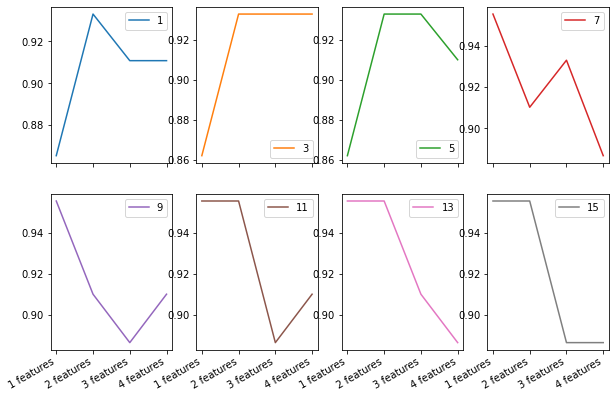

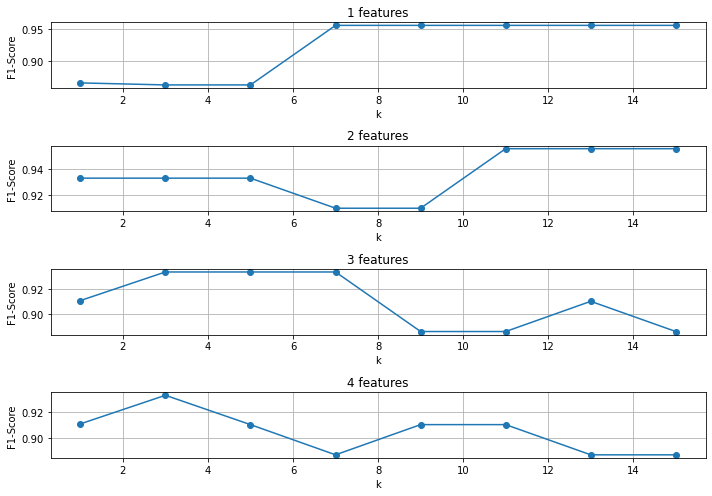

Validate F1-Score - 0.9556
Test F1-Score - 0.9348




Validate F1-Score - 0.9556
Test F1-Score - 0.9348




Validate F1-Score - 0.9556
Test F1-Score - 0.9348




Validate F1-Score - 0.9556
Test F1-Score - 0.9348




Validate F1-Score - 0.9556
Test F1-Score - 0.9348




Validate F1-Score - 0.9556
Test F1-Score - 0.9348




Validate F1-Score - 0.9556
Test F1-Score - 0.9348




Validate F1-Score - 0.9556
Test F1-Score - 0.9348





In [18]:
def ex2_2(x, y, sorted_features):
    # Initialize Variables
    list_of_multiple_features = [sorted_features[:i] for i in range(1, 1 + len(sorted_features))]
    ks = [i for i in range(1, 16, 2)]
    features_to_include = []
    f1_score_features = []
    all_models = []
    X = x
    Y = y
    dataset = Train_Validation_Test(X, Y, 0.3, 0.3)
    labels_nr_features = [str(i) + " features" for i in range(1, len(sorted_features) + 1)]
    list_of_multiple_features = [sorted_features[:i] for i in range(1, 1 + len(sorted_features))]
    
    # Find best parameters
    for feat in sorted_features:
        features_to_include.append(feat)
        X_train = dataset["Train"][0][:, features_to_include]
        X_validate = dataset["Validation"][0][:, features_to_include]

        f1_score_for_this_features = []
        models_for_this_features = []
        
        for k in ks:
            model = k_neighbors(X_train,dataset["Train"][1], k)
            pred = model.predict(X_validate)
            real = dataset["Validation"][1]
            metr = calcula_metricas(pred, real)
            #visualiza_metricas(metr,map_y = iris["target_names"])
            f1_score_for_this_features.append(metr["f1_score"])
            models_for_this_features.append(model)
        f1_score_features.append(f1_score_for_this_features)
        all_models.append(models_for_this_features)
    all_models = pd.DataFrame(all_models, columns=ks, index=labels_nr_features)
    results2_2 = pd.DataFrame(f1_score_features, columns=ks, index=labels_nr_features)
    display(HTML('<h2>Results Table</h2>'))
    display(results2_2)
    
    # Plot results found
    display(HTML('<h2>Results In Plots</h2>'))
    display(HTML('<h5>F1-Score (y) in order to k (subplots) and number of features (x)</h5>'))
    results2_2.plot(subplots=True, layout=(2,4), figsize=(10,7))
    plt.show()
    fig, ax = plt.subplots(len(sorted_features), 1, figsize =(10,7))
    display(HTML('<h5>F1-Score (y) in order to k (x) and number of features (subplots)</h5>'))
    
    i = 0
    for index, row in results2_2.iterrows():
        ax[i].plot(row)
        ax[i].scatter(ks, row)
        ax[i].grid(True)
        ax[i].set(xlabel='k', ylabel='F1-Score', title=index)
        ax[i].set_title(index)
        i += 1
    plt.tight_layout()
    plt.show()
    
    # Show Best Results
    display(HTML('<h2>Best Results</h2>'))
    result = results2_2 == results2_2.max().max()
    best_models = []
    one_of_best = None
    for col in result.columns:
        rows = list(result[col][result[col] == True].index)
        for row in rows:
            display(HTML('<h5>Best Number of Features: ' + str(row) + '<br>Best k: ' + str(col) + '</h5>'))
            best_models.append((row, col))
            X_test = dataset["Test"][0][:, list_of_multiple_features[labels_nr_features.index(row)]]
            pred = all_models.loc[(row, col)].predict(X_test)
            real = dataset["Test"][1]
            metr = calcula_metricas(pred, real)
            one_of_best = metr
            print("Validate F1-Score -", round(results2_2.loc[(row,col)], 4))
            print("Test F1-Score -", round(metr["f1_score"], 4))
            print("\n")
    return one_of_best
    
ex2_2(x_iris,y_iris,reliefF_for_2_2(x_iris,y_iris))
print()

## Conclusões
- **Underfitting/Overfitting:** K = 1 e K = 5 em função do número de features
- **Bias-Variance:** O F1-Score é a relação entre a Precision e o Recall, ou seja, para perceber em detalhe, teríamos de traçar mais gráficos com a Recall e a Precision

### 2.3 -  Forward Feature Selection (FFS)

https://towardsdatascience.com/feature-importance-and-forward-feature-selection-752638849962

,1,3,5,7,9,11,13,15
1 features,0.932698,0.955556,0.955556,0.955556,0.955556,0.955556,0.932698,0.932698
2 features,0.932698,0.955556,0.955556,0.934446,0.934446,0.932698,0.932698,0.932698
3 features,0.955556,0.955556,0.955556,0.977924,0.956019,0.956019,0.977924,0.977924
4 features,0.955556,0.977566,0.977566,0.977566,0.977924,0.977924,0.977924,0.977924


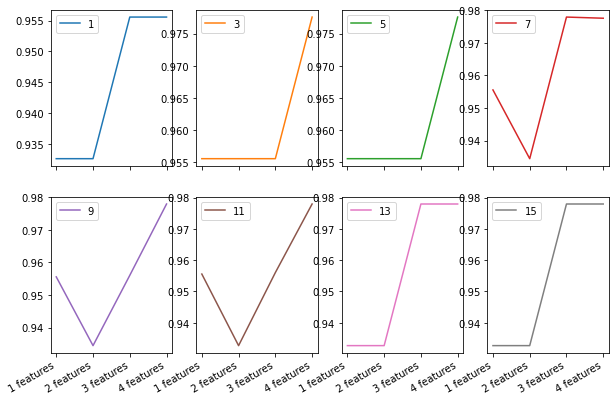

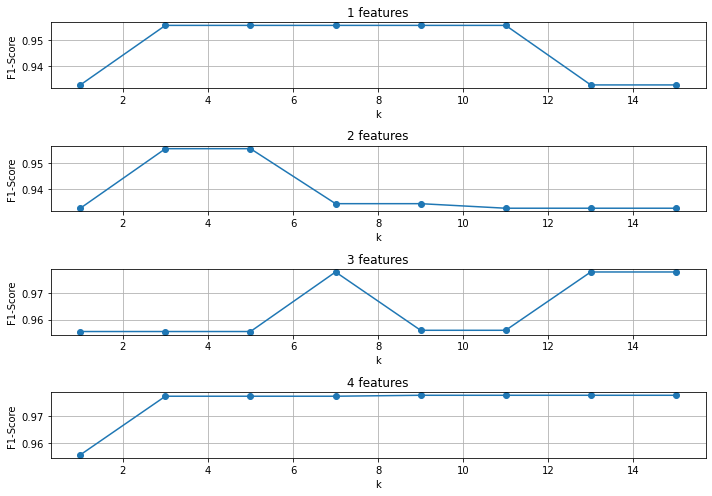

Validate F1-Score - 0.9779
Test F1-Score - 0.9338




Validate F1-Score - 0.9779
Test F1-Score - 0.9338




Validate F1-Score - 0.9779
Test F1-Score - 0.9338




Validate F1-Score - 0.9779
Test F1-Score - 0.9556




Validate F1-Score - 0.9779
Test F1-Score - 0.9338




Validate F1-Score - 0.9779
Test F1-Score - 0.9556




Validate F1-Score - 0.9779
Test F1-Score - 0.9338




In [19]:
def ex_2_3(x, y, labels):
    def forward_feature_selection(x_train, x_test, y_train, y_test, n):
        feature_set = []
        for num_features in range(n):
            metric_list = [] # Choose appropriate metric based on business problem
            model = SGDClassifier() # You can choose any model you like, this technique is model agnostic
            for feature in x_train.columns:
                if feature not in feature_set:
                    f_set = feature_set.copy()
                    f_set.append(feature)
                    model.fit(x_train[f_set], y_train)
                    pred = model.predict(x_test[f_set])

                    metric_list.append((calcula_metricas(pred,y_test)["f1_score"], feature))

            metric_list.sort(key=lambda x : x[0], reverse = True) # In case metric follows "the more, the merrier"
            feature_set.append(metric_list[0][1])
        return feature_set
    
    dataset = Train_Test(x, y, 0.3)
    
    x_train = pd.DataFrame(dataset["Train"][0], columns=labels)
    x_test = pd.DataFrame(dataset["Test"][0], columns=labels)
    y_train = dataset["Train"][1]
    y_test = dataset["Test"][1]
    f = forward_feature_selection(x_train, x_test, y_train, y_test, 4)
    sorted_features = list(map(lambda x: labels.index(x), f))
    ex2_2(x, y, sorted_features)
    
ex_2_3(x_iris,y_iris,iris["feature_names"])

### 2.4 -  Unbalanced Data Base
- Iris-Setosa -> 0
- Iris-Versicolour -> 1
- Iris-Virginica -> 2

In [20]:
iris_df = pd.DataFrame(iris.data, columns=iris["feature_names"])
iris_df["Target"] = iris["target"]
Setosa = iris_df[iris_df["Target"] == 0]
Versicolour = iris_df[iris_df["Target"] == 1].sample(n=30)
Virginica = iris_df[iris_df["Target"] == 2].sample(n=10)
iris_2_4 = Setosa.append(Versicolour)
iris_2_4 = iris_2_4.append(Virginica)
iris_2_4.groupby("Target").count()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
Target,,,,
0,50,50,50,50
1,30,30,30,30
2,10,10,10,10


In [21]:
# Fazer agora a parte de cima com esta base de dados
x_iris_2_4 = np.array(iris_2_4.drop(columns=["Target"]))
y_iris_2_4 = np.array(iris_2_4["Target"])
x_iris_2_4.shape, y_iris_2_4.shape

((90, 4), (90,))

,1,3,5,7,9,11,13,15
1 features,0.962785,0.962785,0.962785,0.8,0.8,0.8,0.8,0.8
2 features,0.962785,0.962785,0.920635,0.8,0.8,0.8,0.8,0.8
3 features,0.962785,0.920635,0.920635,0.8,0.8,0.8,0.8,0.8
4 features,0.920635,0.920635,0.920635,0.8,0.8,0.8,0.8,0.8


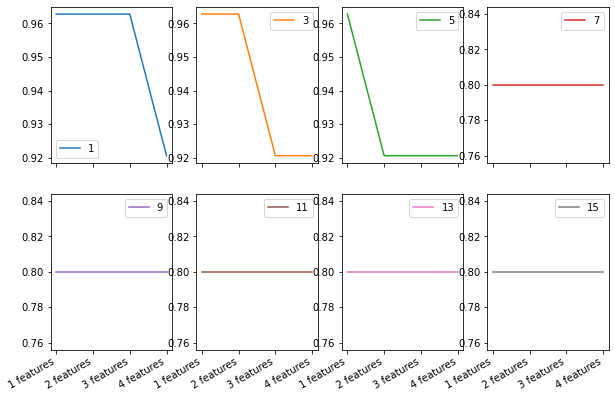

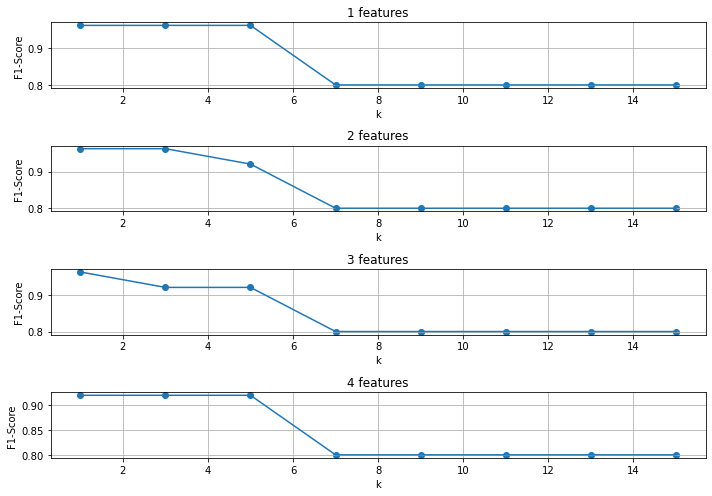

Validate F1-Score - 0.9628
Test F1-Score - 0.8986




Validate F1-Score - 0.9628
Test F1-Score - 0.8986




Validate F1-Score - 0.9628
Test F1-Score - 1.0




Validate F1-Score - 0.9628
Test F1-Score - 0.865




Validate F1-Score - 0.9628
Test F1-Score - 0.9315




Validate F1-Score - 0.9628
Test F1-Score - 0.9315




In [22]:
ex_2_3(x_iris_2_4, y_iris_2_4, iris["feature_names"])

# Ex 3

### Preparar dados

In [23]:
x_main = np.array(all_features.drop(columns=["Atividade"]))
activities_labels = ["palha", "Stand", "Sit", "Sit and Talk", "Walk", "Walk and Talk", "Climb Stair", "Climb Stair and Talk", "Stand to Sit", "Sit to Stand", "Stand to Sit and Talk", "Sit to Stand and Talk", "Stand to Walk", "Walk to Stand", "Stand to Climb Stairs / Stand to Climb Stairs and Talk", "Climb Stairs to Walk", "Climb Stairs and Talk to Walk and Talk"]
labels_target = activities_labels[1:]
y_main = np.array(list(map(lambda x: activities_labels.index(x), all_features["Atividade"])))
x_main.shape, y_main.shape

((14469, 112), (14469,))

### Ex 3 - 2.1.1

,Score
Recall,1.0
Precision,1.0
F1_Score,1.0


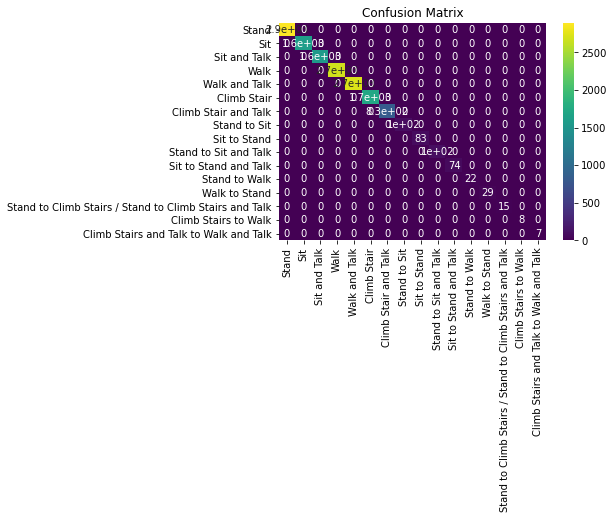

In [24]:
ex211_T0(x_main, y_main, labels_target)

In [25]:
ex211_TT(x_main, y_main, map_y=labels_target)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,814,2,1,21,10,2,0,0,5,0,5,1,5,0,0
1,3,343,137,1,0,0,0,3,0,2,0,0,0,0,0
2,3,131,328,0,1,0,0,6,0,3,0,0,0,0,0
3,16,0,0,281,257,168,71,3,1,2,1,1,0,1,1
4,24,0,1,252,336,136,71,3,1,3,2,0,0,0,1
5,2,0,0,149,134,133,66,1,1,3,0,0,0,1,0
6,4,0,0,81,68,76,20,1,0,2,0,0,0,0,1
7,0,3,9,6,4,1,1,5,0,0,0,0,0,0,0
8,15,0,1,3,4,0,0,1,3,0,0,0,0,0,0
9,4,3,11,2,2,2,0,4,0,1,0,0,0,0,0


,Score
Recall,0.521769
Precision,0.512633
F1_Score,0.516828


,Score
Recall,0.522460
Precision,0.518435
F1_Score,0.519381


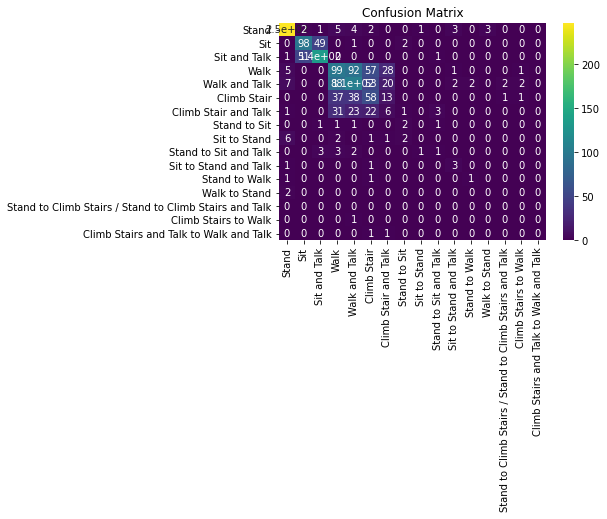

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,287,1,1,6,4,1,0,0,3,0,2,0,2,0
1,1,112,52,0,0,0,0,2,0,1,0,0,0,0
2,3,32,114,0,0,0,0,0,0,2,0,0,0,0
3,5,0,0,81,90,56,22,1,1,0,1,2,0,0
4,3,0,0,80,114,42,23,1,0,0,0,0,0,1
5,0,0,0,57,54,32,19,3,1,1,1,0,0,2
6,0,0,0,21,31,11,9,0,1,0,0,1,0,0
7,0,1,3,3,4,0,0,3,0,0,0,0,0,0
8,6,0,1,1,0,1,0,1,1,0,0,0,0,0
9,0,3,7,0,0,2,0,0,0,0,1,0,0,0


,Score
Recall,0.521078
Precision,0.512540
F1_Score,0.515471


,Score
Recall,0.519005
Precision,0.509077
F1_Score,0.513588


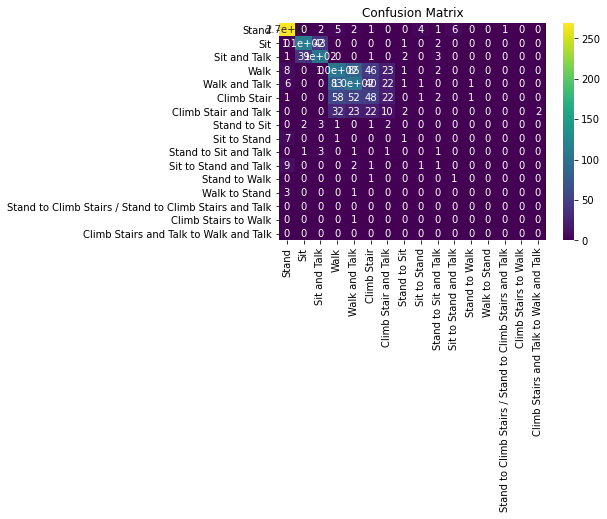

,Score
Recall,0.538355
Precision,0.529122
F1_Score,0.533469


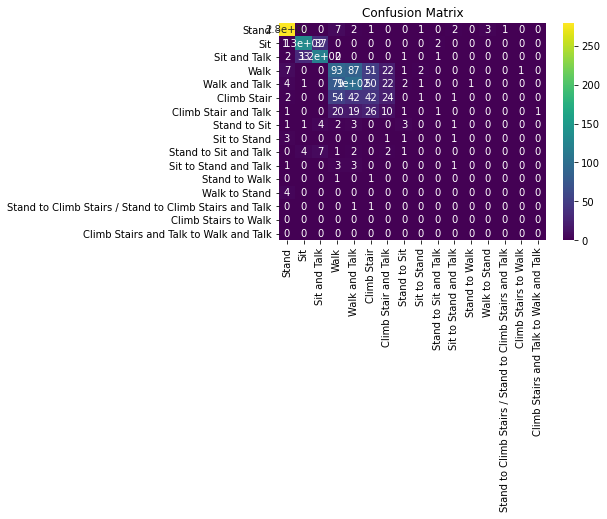

,Score
Recall,0.536282
Precision,0.537988
F1_Score,0.536335


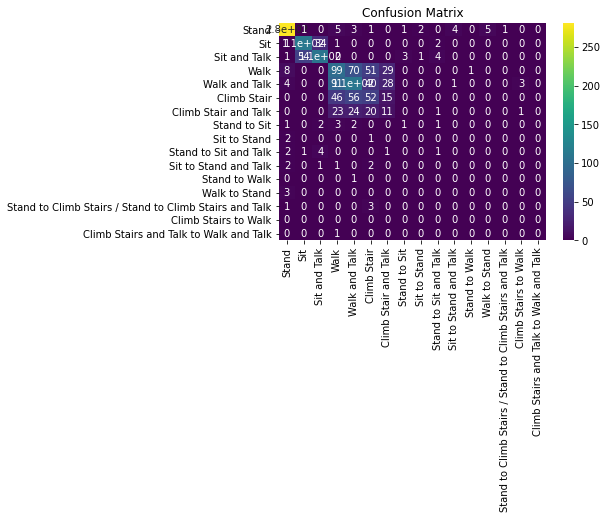

,Score
Recall,0.532827
Precision,0.533796
F1_Score,0.531412


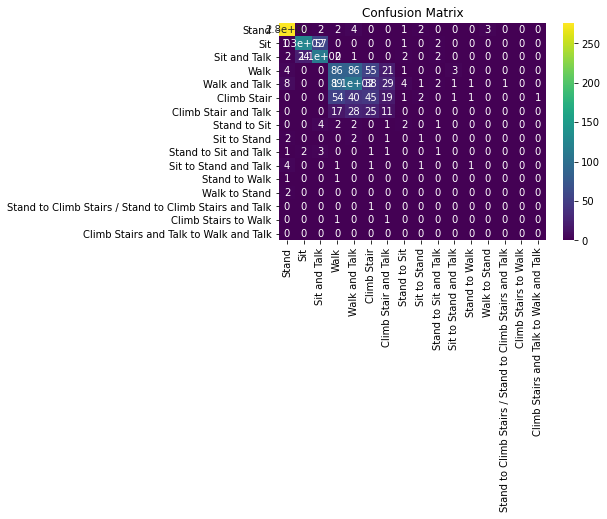

,Score
Recall,0.514167
Precision,0.509733
F1_Score,0.510436


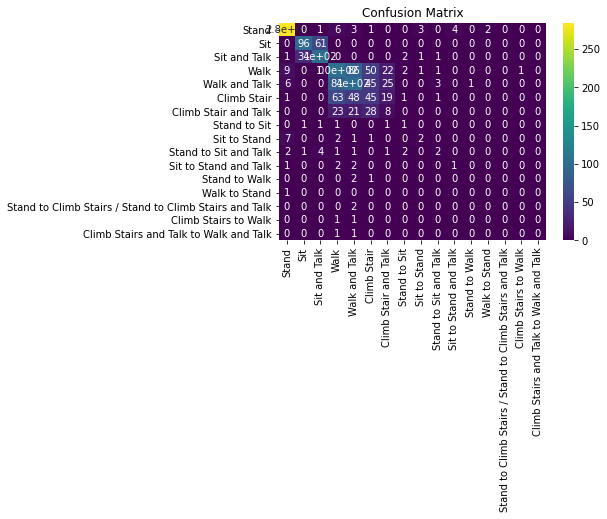

,Score
Recall,0.503801
Precision,0.501291
F1_Score,0.501445


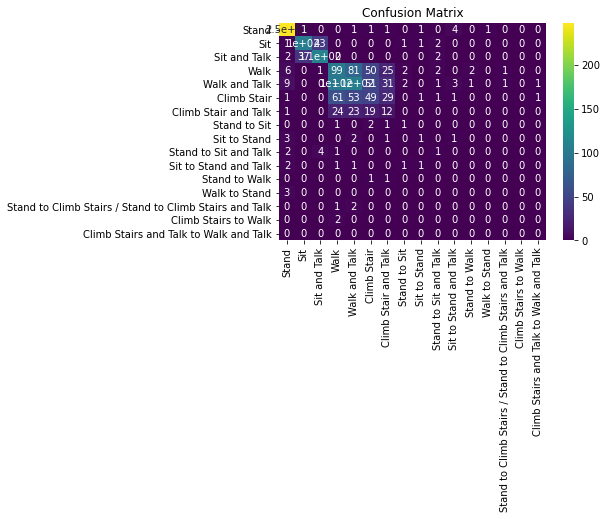

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,277,0,1,6,4,0,0,1,3,0,1,1,4,0,0
1,1,100,58,0,0,0,0,1,0,1,0,0,0,0,0
2,0,38,100,0,0,0,0,1,0,2,1,0,0,0,0
3,13,0,0,103,69,48,19,2,3,1,0,0,0,0,1
4,8,0,0,81,113,47,18,0,0,0,1,1,0,0,0
5,1,0,0,47,51,58,29,0,1,0,0,2,0,0,0
6,0,0,0,22,31,20,12,0,0,0,0,0,0,0,0
7,0,4,4,0,0,0,1,1,3,1,0,0,0,0,0
8,2,0,0,3,0,0,0,0,1,0,0,0,0,0,0
9,1,1,2,1,2,0,1,1,0,0,0,0,0,0,0


,Score
Recall,0.529371
Precision,0.523684
F1_Score,0.525446


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,253,0,3,7,2,0,0,0,0,3,3,1,3,0,0
1,0,120,41,0,0,1,0,0,0,0,0,0,0,0,0
2,0,34,131,0,1,0,0,2,0,3,1,0,0,0,0
3,9,0,0,106,104,40,25,0,1,2,0,0,0,0,0
4,4,0,1,84,99,49,24,0,2,1,0,0,1,0,0
5,0,0,0,47,36,45,21,0,1,0,1,1,0,1,0
6,1,0,1,30,27,23,12,0,0,1,0,0,0,0,0
7,0,1,5,1,0,0,1,1,1,0,0,0,0,0,0
8,0,0,0,2,1,2,0,1,2,1,0,0,0,0,0
9,0,0,1,0,1,2,1,0,1,0,0,0,0,0,0


,Score
Recall,0.531812
Precision,0.533217
F1_Score,0.532056


In [26]:
ex211_10FCV(x_main, y_main, 10, map_y=labels_target)

### Ex 3 - 2.1.2

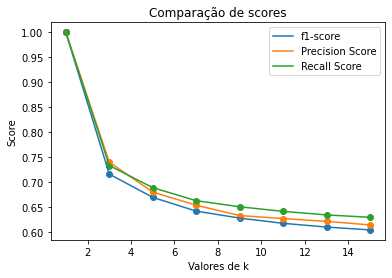

,Score
Recall,0.629898
Precision,0.614687
F1_Score,0.604680


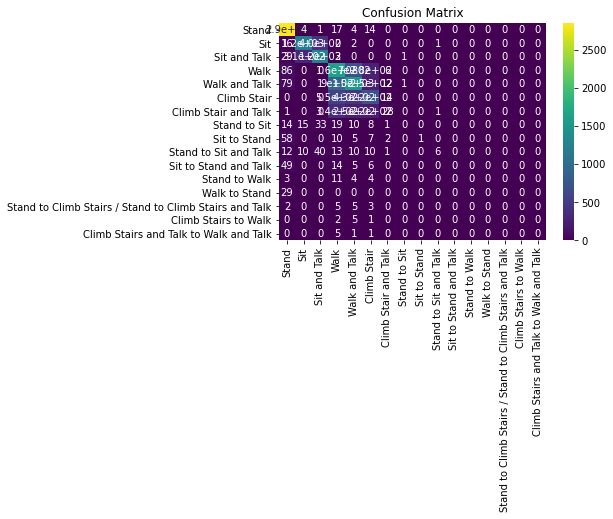

In [27]:
ex212_T0(x_main, y_main, map_y=labels_target)

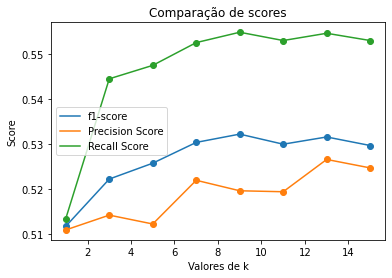

,Score
Recall,0.553098
Precision,0.520126
F1_Score,0.529042


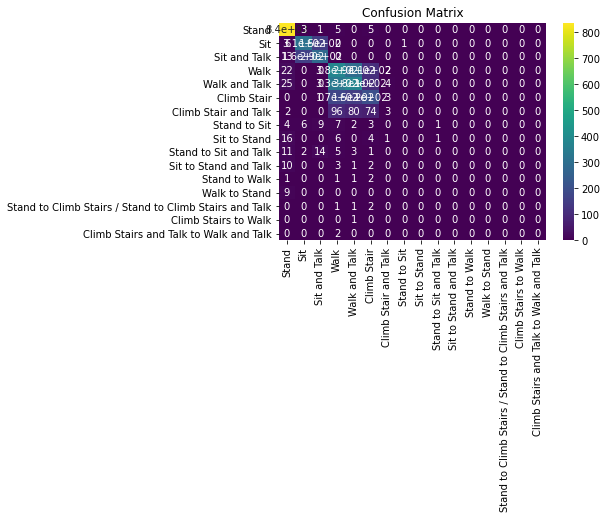

In [28]:
ex_212_TVT(x_main, y_main, map_y=labels_target)

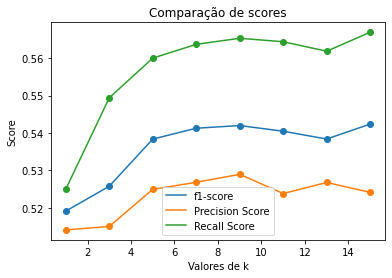

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,287,1,0,3,1,0,0,0,0,0,0,0,0,0,0
1,4,125,41,0,0,0,0,0,0,0,0,0,0,0,0
2,3,30,123,0,1,0,0,0,0,0,0,0,0,0,0
3,7,0,0,133,80,36,2,0,0,0,0,0,0,0,0
4,4,0,0,93,129,25,0,0,0,0,0,0,0,0,0
5,0,0,0,51,55,74,2,0,0,0,0,0,0,0,0
6,0,0,0,27,27,25,2,0,0,0,0,0,0,0,0
7,0,2,3,3,3,1,0,0,0,1,0,0,0,0,0
8,7,0,0,0,0,2,0,0,0,0,0,0,0,0,0
9,2,0,7,1,3,1,0,0,0,0,0,0,0,0,0


,Score
Recall,0.603317
Precision,0.571754
F1_Score,0.577534


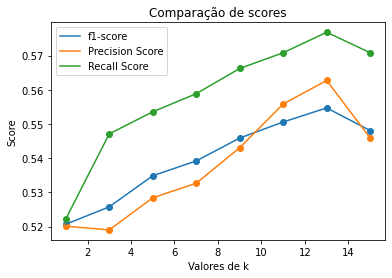

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,286,1,1,3,0,0,0,0,0,0,0,0,0,0,0
1,3,122,49,0,0,0,0,0,0,0,0,0,0,0,0
2,5,40,121,1,0,0,0,0,0,0,0,0,0,0,0
3,5,0,0,132,67,31,1,0,0,0,0,0,0,0,0
4,5,0,0,104,144,33,2,0,0,0,0,0,0,0,0
5,0,0,0,54,47,67,0,0,0,0,0,0,0,0,0
6,0,0,0,32,29,26,2,0,0,0,0,0,0,0,0
7,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0
8,6,0,0,1,2,0,0,0,0,0,0,0,0,0,0
9,2,0,1,0,0,1,1,0,0,1,0,0,0,0,0


,Score
Recall,0.604699
Precision,0.586080
F1_Score,0.583105


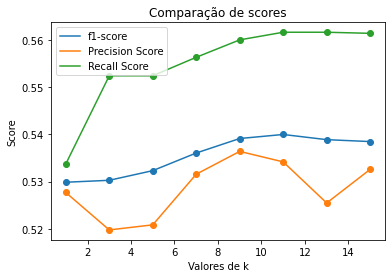

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,268,0,0,2,1,1,0,0,0,0,0,0,0,0,0
1,4,116,60,0,0,0,0,0,0,0,0,0,0,0,0
2,3,34,108,0,1,0,0,0,0,0,0,0,0,0,0
3,14,0,0,140,79,31,1,0,0,0,0,0,0,0,0
4,7,0,0,93,149,22,2,0,0,0,0,0,0,0,0
5,0,0,0,56,52,76,1,0,0,0,0,0,0,0,0
6,1,0,0,29,27,30,3,0,0,0,0,0,0,0,0
7,2,2,3,0,0,0,0,0,0,0,0,0,0,0,0
8,3,0,0,2,0,0,0,0,0,0,0,0,0,0,0
9,0,1,6,0,0,1,0,0,0,1,0,0,0,0,0


,Score
Recall,0.595024
Precision,0.580854
F1_Score,0.571694


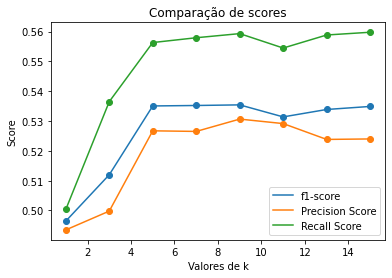

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,263,1,0,3,0,2,0,0,0,0,0,0,0,0,0
1,2,114,35,0,0,0,0,0,0,0,0,0,0,0,0
2,0,49,123,0,0,0,0,0,0,0,0,0,0,0,0
3,5,0,0,157,83,26,1,0,0,0,0,0,0,0,0
4,14,0,0,103,136,30,1,1,0,0,0,0,0,0,0
5,0,0,0,72,49,60,3,0,0,0,0,0,0,0,0
6,0,0,0,34,21,15,0,0,0,0,0,0,0,0,0
7,2,0,3,1,2,1,1,0,0,0,0,0,0,0,0
8,6,0,0,1,0,1,1,0,0,0,0,0,0,0,0
9,2,2,4,3,1,0,0,0,0,0,0,0,0,0,0


,Score
Recall,0.589496
Precision,0.547549
F1_Score,0.564247


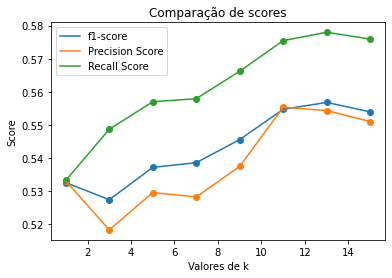

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,267,0,0,1,0,1,0,0,0,0,0,0,0,0,0
1,3,110,67,0,0,0,0,0,0,0,0,0,0,0,0
2,7,28,116,0,0,0,0,0,0,0,0,0,0,0,0
3,11,0,0,174,89,26,1,0,0,0,0,0,0,0,0
4,7,0,0,90,134,19,3,0,0,0,0,0,0,0,0
5,0,0,0,49,50,63,1,0,0,0,0,0,0,0,0
6,0,0,0,34,28,19,3,0,0,0,0,0,0,0,0
7,0,2,7,3,2,0,0,0,0,0,0,0,0,0,0
8,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9,0,3,4,2,0,1,0,0,0,0,0,0,0,0,0


,Score
Recall,0.599171
Precision,0.572798
F1_Score,0.572591


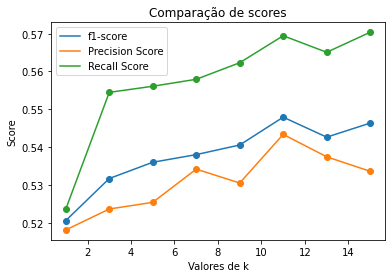

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,290,2,1,2,0,0,0,0,0,0,0,0,0,0
1,0,101,47,0,0,0,0,0,0,0,0,0,0,0
2,3,48,128,0,0,0,0,0,0,0,0,0,0,0
3,11,0,0,143,97,28,0,0,0,0,0,0,0,0
4,9,0,0,107,135,22,2,0,0,0,0,0,0,0
5,0,0,0,52,40,65,2,0,0,0,0,0,0,0
6,0,0,0,24,31,20,1,0,0,0,0,0,0,0
7,0,0,1,0,0,1,0,0,0,0,0,0,0,0
8,7,0,0,0,2,0,0,0,0,0,0,0,0,0
9,4,0,2,0,1,2,0,0,0,1,0,0,0,0


,Score
Recall,0.597097
Precision,0.570638
F1_Score,0.575332


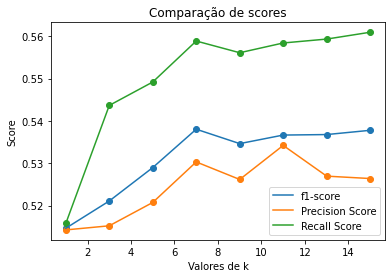

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,318,1,1,3,0,0,0,0,0,0,0,0,0,0,0
1,1,103,40,0,0,0,0,0,0,0,0,0,0,0,0
2,5,28,120,0,0,0,0,0,0,0,0,0,0,0,0
3,10,0,0,147,78,28,1,0,0,0,0,0,0,0,0
4,4,0,0,98,125,28,1,1,0,0,0,0,0,0,0
5,0,0,0,58,48,66,0,0,0,0,0,0,0,0,0
6,0,0,0,39,20,21,5,0,0,0,0,0,0,0,0
7,2,4,0,3,2,1,0,0,0,0,0,0,0,0,0
8,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9,1,0,3,1,0,4,0,0,0,1,0,0,0,0,0


,Score
Recall,0.611610
Precision,0.608868
F1_Score,0.588387


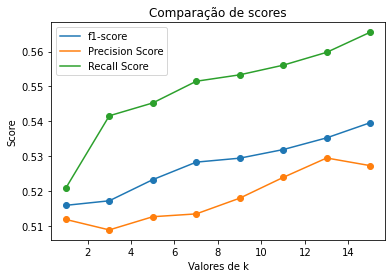

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,265,0,1,2,1,2,0,0,0,0,0,0,0,0,0
1,0,119,43,0,1,0,0,0,0,0,0,0,0,0,0
2,4,40,116,0,0,0,0,0,0,0,0,0,0,0,0
3,5,0,0,153,79,27,1,0,0,0,0,0,0,0,0
4,9,0,1,102,150,30,0,0,0,0,0,0,0,0,0
5,0,0,0,65,37,63,1,0,0,0,0,0,0,0,0
6,0,0,0,43,20,24,2,0,0,0,0,0,0,0,0
7,3,0,3,2,1,3,0,0,0,0,0,0,0,0,0
8,5,0,0,2,2,0,0,0,0,0,0,0,0,0,0
9,2,0,3,1,1,1,0,0,0,2,0,0,0,0,0


,Score
Recall,0.601244
Precision,0.591466
F1_Score,0.577989


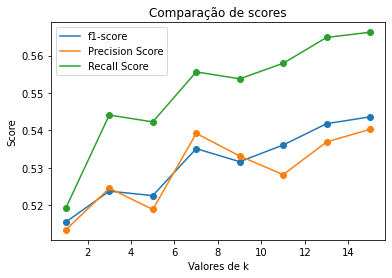

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,302,3,0,3,0,2,0,0,0,0,0,0,0
1,0,113,42,1,0,0,0,0,0,0,0,0,0
2,0,26,92,0,1,0,0,0,0,0,0,0,0
3,9,0,0,187,62,32,1,0,0,0,0,0,0
4,3,0,0,106,135,19,1,0,0,0,0,0,0
5,0,0,0,61,29,76,3,0,0,0,0,0,0
6,0,0,0,36,27,21,5,0,0,0,0,0,0
7,1,3,6,1,0,2,0,1,0,0,0,0,0
8,7,0,0,1,0,1,0,0,0,0,0,0,0
9,0,0,5,1,2,1,0,0,0,0,0,0,0


,Score
Recall,0.629578
Precision,0.618389
F1_Score,0.605358


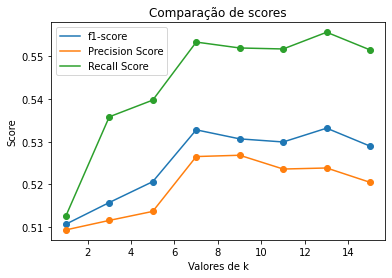

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,291,1,2,3,0,2,0,0,0,0,0,0,0,0
1,0,104,44,0,0,0,0,0,0,0,0,0,0,0
2,3,40,115,1,0,0,0,0,0,0,0,0,0,0
3,10,0,0,152,70,17,2,0,0,0,0,0,0,0
4,17,0,0,117,130,25,2,0,0,0,0,0,0,0
5,0,0,0,58,43,68,2,0,0,0,0,0,0,0
6,0,0,0,39,23,14,1,0,0,1,0,0,0,0
7,3,0,5,4,0,0,0,0,0,0,0,0,0,0
8,8,0,0,3,0,2,1,0,0,0,0,0,0,0
9,0,2,6,4,0,0,0,0,0,0,0,0,0,0


,Score
Recall,0.595436
Precision,0.559198
F1_Score,0.569030


,1,3,5,7,9,11,13,15
Fold 0,0.519137,0.525803,0.538381,0.541284,0.542003,0.540477,0.538401,0.542395
Fold 1,0.520676,0.525768,0.534866,0.539189,0.545883,0.550576,0.554695,0.548067
Fold 2,0.529875,0.530290,0.532331,0.536064,0.539131,0.539985,0.538889,0.538484
Fold 3,0.496437,0.511997,0.535060,0.535216,0.535423,0.531388,0.533877,0.534897
Fold 4,0.532632,0.527466,0.537215,0.538629,0.545606,0.554741,0.556809,0.553962
Fold 5,0.520570,0.531696,0.535995,0.538016,0.540563,0.547919,0.542634,0.546351
Fold 6,0.514656,0.521091,0.528980,0.538035,0.534636,0.536655,0.536774,0.537779
Fold 7,0.515909,0.517214,0.523275,0.528298,0.529434,0.531897,0.535259,0.539598
Fold 8,0.515508,0.523766,0.522572,0.535129,0.531641,0.536103,0.541801,0.543623
Fold 9,0.510665,0.515749,0.520639,0.532772,0.530656,0.529932,0.533163,0.528950


F1-Score (y) in order to k (subplots) and number of features (x)


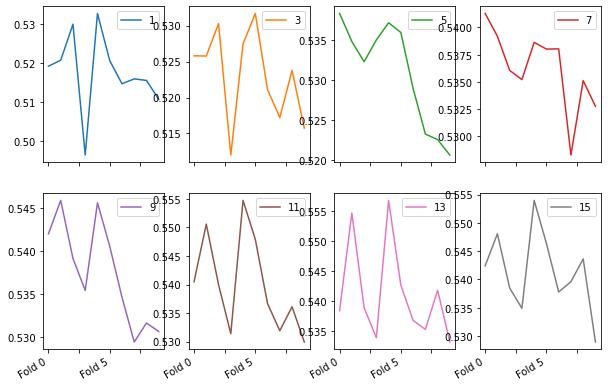

F1-Score (y) in order to k (x) and number of features (subplots)


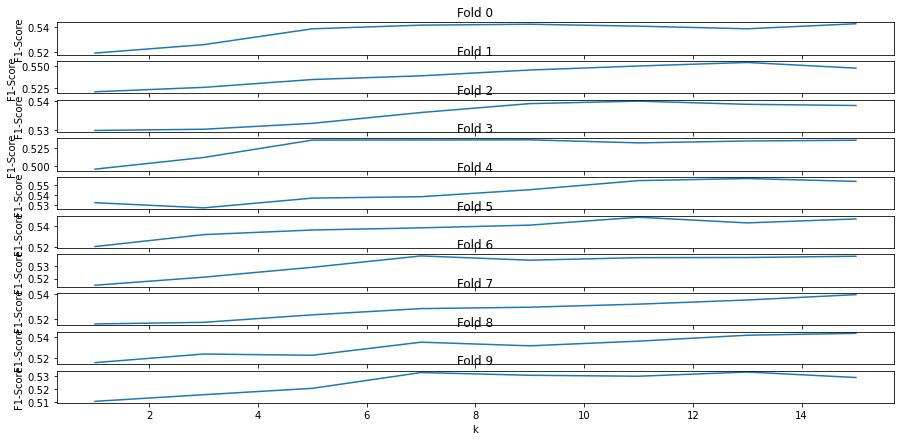

In [29]:
ex_212_10CV(x_main, y_main, map_y=labels_target)

### Ex 3 - 2.2

,1,3,5,7,9,11,13,15
1 features,0.314960,0.346567,0.353464,0.348937,0.345562,0.345381,0.347511,0.350400
2 features,0.385543,0.398141,0.398972,0.402962,0.409098,0.402822,0.409247,0.406620
3 features,0.377764,0.378845,0.388818,0.385623,0.384107,0.384495,0.383992,0.379947
4 features,0.553545,0.560117,0.583004,0.586660,0.584536,0.585961,0.585749,0.578096
5 features,0.663061,0.668283,0.672393,0.671604,0.664954,0.663237,0.662286,0.655925
6 features,0.679869,0.686936,0.693051,0.684085,0.681389,0.677085,0.681970,0.677763
7 features,0.624714,0.613702,0.607058,0.599263,0.591108,0.586165,0.579680,0.573485
8 features,0.629719,0.612814,0.621444,0.611545,0.595311,0.592459,0.589616,0.586134
9 features,0.619034,0.604417,0.600864,0.598849,0.594911,0.581891,0.581116,0.583462
10 features,0.625350,0.604699,0.597647,0.599114,0.597386,0.592223,0.594858,0.586945


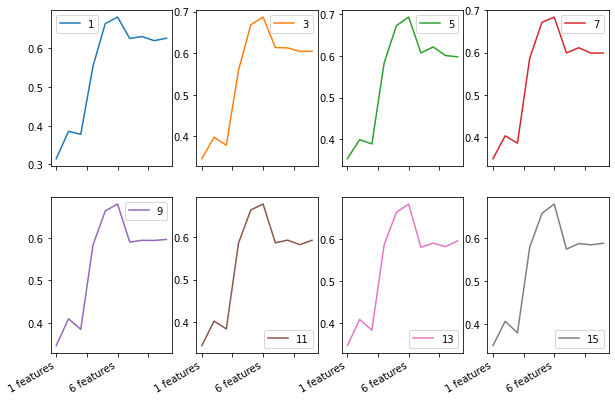

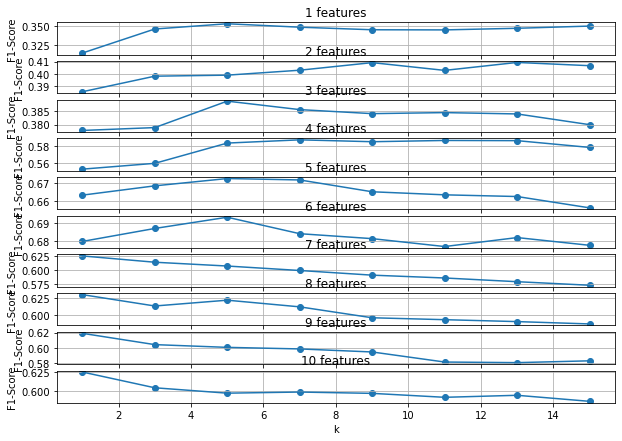

Validate F1-Score - 0.6931
Test F1-Score - 0.6759




In [30]:
results2_2 = ex2_2(x_main, y_main, reliefF_for_2_2(x_main, y_main))

### Ex 3 - 2.3

,1,3,5,7,9,11,13,15
1 features,0.383450,0.404560,0.414727,0.430332,0.432553,0.432175,0.439619,0.442615
2 features,0.588785,0.600501,0.609152,0.611291,0.614551,0.613138,0.614603,0.614837
3 features,0.643157,0.641220,0.642257,0.644232,0.641427,0.639193,0.636535,0.638744
4 features,0.655574,0.657244,0.673825,0.669163,0.673422,0.670424,0.664222,0.665214


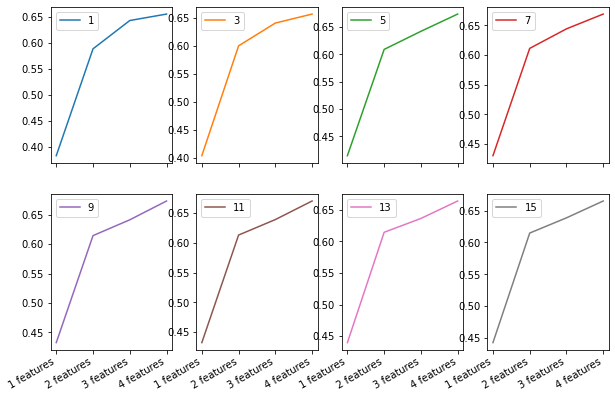

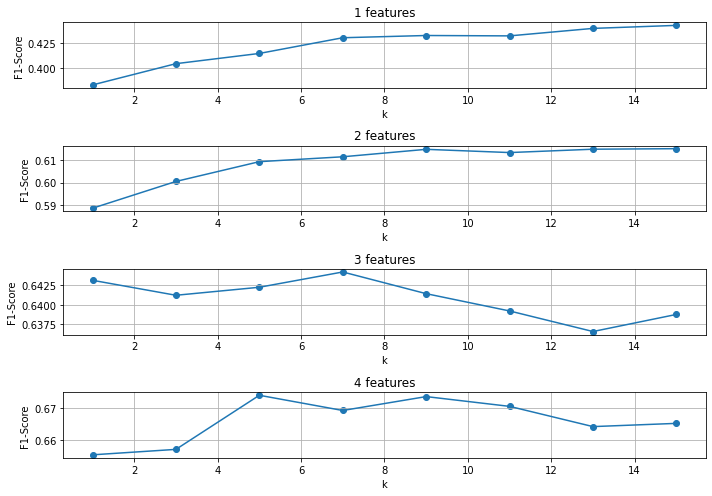

Validate F1-Score - 0.6738
Test F1-Score - 0.6861




In [31]:
ex_2_3(x_main, y_main, list(all_features.columns)[:-1])

# Exercício 4

In [32]:
x_main = x_main[:, reliefF_for_2_2(x_main, y_main)]
dataset = Train_Validation_Test(x_main, y_main, 0.3, 0.3)

## Exercício 4.1
- **Modelo de separação dos dados**: TVT (0.4, 0.3, 0.3)
- **Número de camadas escondidas**: 1 camada escondida
- **Número de neurónios na camada escondida**: 3 a 15
- **Função de ativação**: Função Sigmoide
- **Batch Learning**: Gradiente Descendente
- **Learning rate**: constante (0.1)
- **Momentum**: 0.9

Máximo valor: (11, 0.5446302505516684)


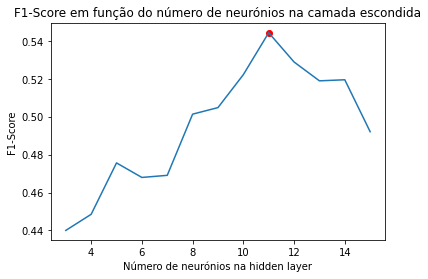

,Score
Recall,0.549643
Precision,0.529216
F1_Score,0.523684


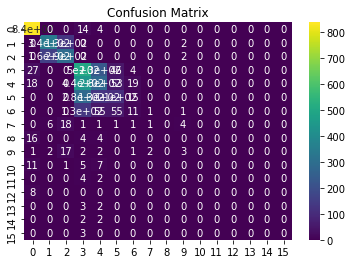

In [33]:
models = []
scores = []

x = [i for i in range(3, 16)]

for i in x:   # Ver o melhor número de neurónios na hidden layer 
    mlp = MLPClassifier(hidden_layer_sizes=(i), activation='logistic', solver='sgd', learning_rate_init=0.1)
    mlp.fit(dataset["Train"][0], dataset["Train"][1])
    
    models.append(mlp)
    
    pred = mlp.predict(dataset["Validation"][0])
    
    scores.append(calcula_metricas(pred, dataset["Validation"][1])["f1_score"])
    
print("Máximo valor: ({}, {})".format(x[scores.index(max(scores))], max(scores)))
plt.title("F1-Score em função do número de neurónios na camada escondida")
plt.xlabel("Número de neurónios na hidden layer")
plt.ylabel("F1-Score")
plt.plot(x, scores)
plt.scatter(x[scores.index(max(scores))], max(scores), color='r')
plt.show()

best_model = models[scores.index(max(scores))]
pred = best_model.predict(dataset["Test"][0])
results_4_1 = calcula_metricas(pred, dataset["Test"][1])
visualiza_metricas(calcula_metricas(pred, dataset["Test"][1]))

## Exercício 4.2
- **Modelo de separação dos dados**: TVT (0.4, 0.3, 0.3)
- **Número de camadas escondidas**: 1 camada escondida
- **Número de neurónios na camada escondida**: 3 a 15
- **Função de ativação**: Função Sigmoide
- **Batch Learning**: Gradiente Descendente
- **Learning rate**: Invscaling
- **Momentum**: 0.9

Máximo valor: (11, 0.4401852502600809)


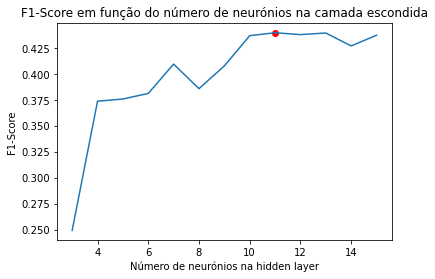

,Score
Recall,0.493204
Precision,0.404193
F1_Score,0.432685


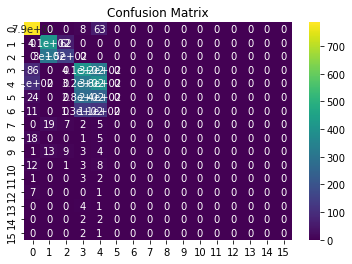

In [34]:
models = []
scores = []

x = [i for i in range(3, 16)]

for i in x:   # Ver o melhor número de neurónios na hidden layer 
    mlp = MLPClassifier(hidden_layer_sizes=(i), activation='logistic', solver='sgd', learning_rate_init=0.2, learning_rate='invscaling')
    mlp.fit(dataset["Train"][0], dataset["Train"][1])
    
    models.append(mlp)
    
    pred = mlp.predict(dataset["Validation"][0])
    
    scores.append(calcula_metricas(pred, dataset["Validation"][1])["f1_score"])
    
print("Máximo valor: ({}, {})".format(x[scores.index(max(scores))], max(scores)))
plt.title("F1-Score em função do número de neurónios na camada escondida")
plt.xlabel("Número de neurónios na hidden layer")
plt.ylabel("F1-Score")
plt.plot(x, scores)
plt.scatter(x[scores.index(max(scores))], max(scores), color='r')
plt.show()

best_model = models[scores.index(max(scores))]
pred = best_model.predict(dataset["Test"][0])
results_4_2 = calcula_metricas(pred, dataset["Test"][1])
visualiza_metricas(calcula_metricas(pred, dataset["Test"][1]))

## Exercício 4.3
- **Modelo de separação dos dados**: TVT (0.4, 0.3, 0.3)
- **Número de camadas escondidas**: 1 camada escondida
- **Número de neurónios na camada escondida**: 3 a 15
- **Função de ativação**: Função Sigmoide
- **Batch Learning**: Gradiente Descendente
- **Learning rate**: Constante (0.1)
- **Momentum**: 0.3

Máximo valor: (15, 0.5406321781713739)


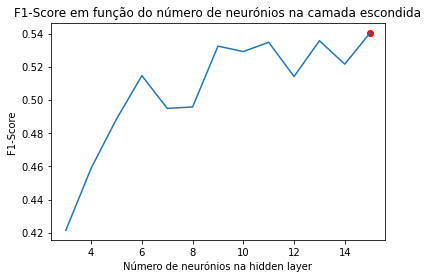

,Score
Recall,0.544114
Precision,0.560477
F1_Score,0.516242


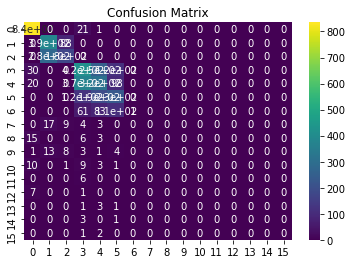

In [35]:
models = []
scores = []

x = [i for i in range(3, 16)]

for i in x:   # Ver o melhor número de neurónios na hidden layer 
    mlp = MLPClassifier(hidden_layer_sizes=(i), activation='logistic', solver='sgd', learning_rate_init=0.1, momentum=0.3)
    mlp.fit(dataset["Train"][0], dataset["Train"][1])
    
    models.append(mlp)
    
    pred = mlp.predict(dataset["Validation"][0])
    
    scores.append(calcula_metricas(pred, dataset["Validation"][1])["f1_score"])
    
print("Máximo valor: ({}, {})".format(x[scores.index(max(scores))], max(scores)))
plt.title("F1-Score em função do número de neurónios na camada escondida")
plt.xlabel("Número de neurónios na hidden layer")
plt.ylabel("F1-Score")
plt.plot(x, scores)
plt.scatter(x[scores.index(max(scores))], max(scores), color='r')
plt.show()

best_model = models[scores.index(max(scores))]
pred = best_model.predict(dataset["Test"][0])
results_4_3 = calcula_metricas(pred, dataset["Test"][1])
visualiza_metricas(calcula_metricas(pred, dataset["Test"][1]))

## Comparar Resultados

,Score
Recall,0.695923
Precision,0.664411
F1_Score,0.675939


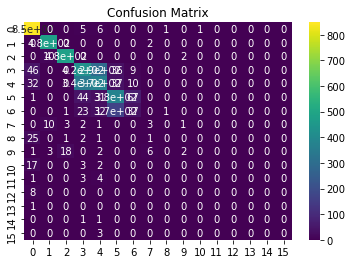

,Score
Recall,0.549643
Precision,0.529216
F1_Score,0.523684


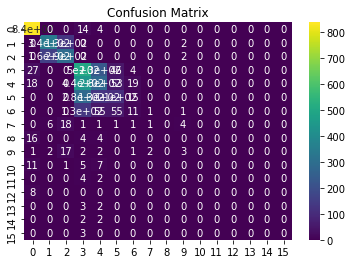

,Score
Recall,0.493204
Precision,0.404193
F1_Score,0.432685


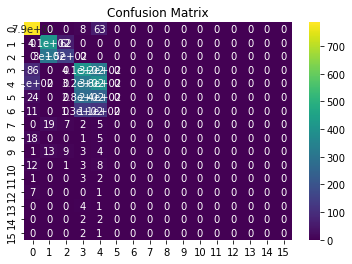

,Score
Recall,0.544114
Precision,0.560477
F1_Score,0.516242


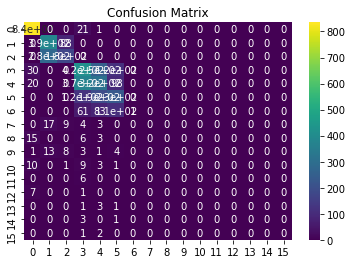

In [36]:
display(HTML('<h2>Resultados 2.2</h2>'))
visualiza_metricas(results2_2)
display(HTML('<h2>Resultados 4.1</h2>'))
visualiza_metricas(results_4_1)
display(HTML('<h2>Resultados 4.2</h2>'))
visualiza_metricas(results_4_2)
display(HTML('<h2>Resultados 4.3</h2>'))
visualiza_metricas(results_4_3)

## Ordem dos resultados (ordenados pelo F1-Score):
- 2.2 > 4.1 > 4.3 > 4.2
- 0.675939 > 0.523684 > 0.516242 > 0.432685

## Conclusões
- As redes neuronais, relativamente ao KNN, obteve piores resultados.
- De modo a melhorar os resultados das redes neuronais, poderíamos fazer o seguinte:
    - Testar para várias arquiteturas de redes (mais hidden layers, variar ainda mais o número de neurónios nas camadas escondidas)
    - Testar para diferentes funções de ativação
    - Testar para diferentes números de epochs e batch sizes

# Exercício 5 - Rede Neuronal implementada de raíz

In [1]:
class MlpFromScratch():
    def __init__(self,x,y,hidden=[10,],number_outputs = 1,verbouse = False):
        self.number_outputs = number_outputs
        # mostrar prints
        self.verbouse = False
        self.x = x
        
        # diferenciar entre single class e multi class
        if number_outputs != 1:
            new_y = []
            for y_value in y:
                out = np.zeros(number_outputs)
                out[y_value] = 1
                new_y.append(out)
            self.y = np.array(new_y)
        else:
            self.y = y
        
        self.total_layers = [self.x.shape[1]] + hidden + [number_outputs]
        print("MLP Architecture:",self.total_layers)
        self.size_weights = len(self.total_layers) - 1
        
        # ligacoes entre nos
        self.weights = [np.random.rand(self.total_layers[i],self.total_layers[i+1]) for i in range(self.size_weights)]
        
        #pesos dos nos
        self.activations = [np.zeros(self.total_layers[i]) for i in range(len(self.total_layers))]
        
        # auxiliar para a backpropagation com a mesma dimensao que os weights
        self.derivatives = [np.zeros((self.total_layers[i],self.total_layers[i+1])) for i in range(self.size_weights)]
    
    '''----- PUBLIC -----''' 
    
    # Treino da Rede Neuronal
    def fit(self,epochs=100, learning_rate=0.2):
        for i in range(epochs):
            sum_error = 0
            for input_x,target_y in zip(self.x,self.y):
                # forward Propagation
                out = self._fp(input_x)
                error = target_y - out 
                # Back Propagation -> recebe o erro
                self._back_propagation(error)
                
                # verificacao
                self._gradient_descent(learning_rate=learning_rate)
                
                sum_error += np.average((target_y-out)**2) # Min Squared Error
                
            # report error -> ver evolucao por epoch
            if self.verbouse:
                print("EPOCH["+str(i)+"] Error:",round(sum_error/len(self.x),4))
    
    def predict(self,test):
        if self.number_outputs == 1: 
            return np.array([self._fp(t) for t in test])
        else:
            output = []
            for t in test:
                pred = list(self._fp(t))
                # maximo dos nos do output
                output.append(pred.index(max(pred)))
            return np.array(output)
    
    '''----- PRIVATE -----'''
    def _fp(self,inputs): # forward propagation
        activations = inputs # na primeira layer a activation sao os inputs
        self.activations[0] = inputs
        for i,w in enumerate(self.weights):
            # calculate the inputs -> multiplicar os valores pelos weights
            net_inputs = np.dot(self.activations[i],w)
            # calculate activation -> aplicar a funcao de ativacao no resultados anterior
            activations = self._sigmoid(net_inputs)
            self.activations[i+1] = activations
        return activations # output final

    
    def _back_propagation(self,error):
        for i in reversed(range(self.size_weights)):
            activations = self.activations[i+1]
            
            # multiplicacao do array dos erros com o array das derivadas dos pesos dos nos
            delta = error * self._sigmoid(activations,deriv=True)
            delta_reshaped = delta.reshape(delta.shape[0],-1).T
            
            current_activation = self.activations[i]
            current_activation_reshaped = current_activation.reshape(
                            current_activation.shape[0],-1)
            
            # Atualiza as derivadas
            self.derivatives[i] = np.dot(current_activation_reshaped,delta_reshaped)
            error = np.dot(delta, self.weights[i].T)
            #print("Derivatives:",self.derivatives[i])
        return error
            
    def _gradient_descent(self,learning_rate):
        for i in range(self.size_weights):
            # Atualiza os weights com base na derivada e no learning rate
            self.weights[i] += self.derivatives[i] * learning_rate
            
    
    # formula da funcao sigmoid
    def _sigmoid(self, x, deriv=False):
        if (deriv == True):
            return x * (1.0 - x)
        return 1 / (1 + np.exp(-x))

## Teste para somas normalizadas

In [38]:
inputs = np.array([[random() / 2 for _ in range(2)] for _ in range(1000)])
targets = np.array([[i[0] + i[1]] for i in inputs])
mlp = MlpFromScratch(inputs, targets)
mlp.fit(epochs=100, learning_rate=0.1)
print("{} + {} = {}".format(0.4, 0.1, round(mlp.predict([[0.4, 0.1]])[0][0], 1)))
print("{} + {} = {}".format(0.1, 0.5, round(mlp.predict([[0.1, 0.5]])[0][0], 1)))
print("{} + {} = {}".format(0.6, 0.2, round(mlp.predict([[0.6, 0.2]])[0][0], 1)))

MLP Architecture: [2, 10, 1]
0.4 + 0.1 = 0.5
0.1 + 0.5 = 0.6
0.6 + 0.2 = 0.8


## Teste para Iris - MLP nosso

MLP Architecture: [4, 10, 3]


,Score
Recall,0.873333
Precision,0.908213
F1_Score,0.868589


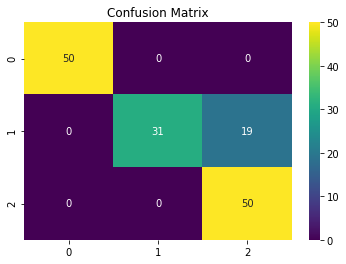

In [39]:
# Exemplo de teste

mlp = MlpFromScratch(x_iris,y_iris,hidden=[10],number_outputs=3)
mlp.fit(epochs=100, learning_rate=0.1)
pred=mlp.predict(x_iris)
real = y_iris
visualiza_metricas(calcula_metricas(pred,real))

MLP Architecture: [10, 3, 16]
MLP Architecture: [10, 4, 16]
MLP Architecture: [10, 5, 16]
MLP Architecture: [10, 6, 16]
MLP Architecture: [10, 7, 16]
MLP Architecture: [10, 8, 16]
MLP Architecture: [10, 9, 16]
MLP Architecture: [10, 10, 16]
MLP Architecture: [10, 11, 16]
MLP Architecture: [10, 12, 16]
MLP Architecture: [10, 13, 16]
MLP Architecture: [10, 14, 16]
MLP Architecture: [10, 15, 16]

Máximo valor: (9, 0.47905801346392296)


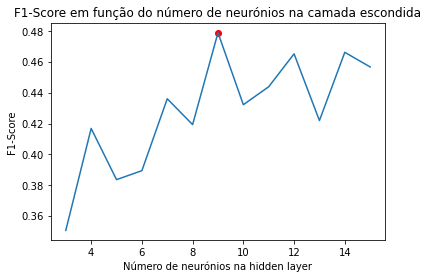

,Score
Recall,0.512555
Precision,0.498724
F1_Score,0.456885


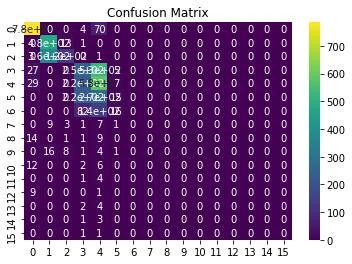

In [40]:
models = []
scores = []
y_main_v2 = np.subtract(y_main, np.ones(len(y_main))).astype(int)
dataset = Train_Validation_Test(x_main, y_main_v2, 0.3, 0.3)

x = [i for i in range(3, 16)]

for i in x:   # Ver o melhor número de neurónios na hidden layer 
    mlp = MlpFromScratch(dataset["Train"][0], dataset["Train"][1], hidden=[i], number_outputs=16)
    mlp.fit(epochs=100, learning_rate=0.1)
    
    models.append(mlp)
    
    pred = mlp.predict(dataset["Validation"][0])
    
    scores.append(calcula_metricas(pred, dataset["Validation"][1])["f1_score"])

print("\nMáximo valor: ({}, {})".format(x[scores.index(max(scores))], max(scores)))
plt.title("F1-Score em função do número de neurónios na camada escondida")
plt.xlabel("Número de neurónios na hidden layer")
plt.ylabel("F1-Score")
plt.plot(x, scores)
plt.scatter(x[scores.index(max(scores))], max(scores), color='r')
plt.show()

best_model = models[scores.index(max(scores))]
pred = best_model.predict(dataset["Test"][0])
visualiza_metricas(calcula_metricas(pred, dataset["Test"][1]))